In [76]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import numpy as np  
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import warnings
# Ignore warning messages to enhance code readability

# Suppress all warnings to ensure a clean output
warnings.filterwarnings('ignore')

In [77]:
# upload dataset
data= pd.read_csv('dft-road-casualty-statistics-collision-last-5-years.csv')
data

accident_index  accident_year accident_reference  \
0       2018010080971           2018           10080971   
1       2018010080973           2018           10080973   
2       2018010080974           2018           10080974   
3       2018010080981           2018           10080981   
4       2018010080982           2018           10080982   
...               ...            ...                ...   
538456  2022991311627           2022          991311627   
538457  2022991312498           2022          991312498   
538458  2022991315177           2022          991315177   
538459  2022991321308           2022          991321308   
538460  2022991322411           2022          991322411   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    529150.0                182270.0  -0.139737  51.524587   
1                    542020.0                184290.0   0.046471  51.539651   
2                    531720.0                182910.0  -0.102474  51.529746   
3                    541450.0                183220.0   0.037828  51.530179   
4                    543580.0                176500.0   0.065781  51.469258   
...                       ...                     ...        ...        ...   
538456               235016.0                625551.0  -4.613246  55.495815   
538457               127459.0                663067.0  -6.348650  55.783849   
538458               254396.0                663549.0  -4.326930  55.843114   
538459               325409.0                677054.0  -3.196963  55.980648   
538460               324745.0                673696.0  -3.206662  55.950381   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   2  ...   
1                  1                  3                   1  ...   
2                  1                  3                   2  ...   
3                  1                  2                   2  ...   
4                  1                  2                   2  ...   
...              ...                ...                 ...  ...   
538456            99                  2                   1  ...   
538457            99                  2                   3  ...   
538458            99                  3                   1  ...   
538459            99                  2                   1  ...   
538460            99                  2                   1  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
0                                             0                4   
1                                             0                4   
2                                             5                4   
3                                             5                4   
4                                             0                4   
...                                         ...              ...   
538456                                        1                1   
538457                                        0                6   
538458                                        5                1   
538459                                        8                4   
538460                                        0                4   

        weather_conditions road_surface_conditions  \
0                        1                       1   
1                        1                       1   
2                        1                       1   
3                        2                       2   
4                        1                       2   
...                    ...                     ...   
538456                   1                       1   
538457                   1                       1   
538458                   1                       1   
538459                   1                       1   
538460                   1                       2   

        special_conditions_at_site carriageway_hazards urban_or_ru

In [78]:
data.isnull().sum() 

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          136
location_northing_osgr                         136
longitude                                      136
latitude                                       136
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [79]:
# Display entries with missing values
missing_values = data[data.isnull().any(axis=1)]
missing_values


accident_index  accident_year accident_reference  \
3245    2018010091325           2018           10091325   
6981    2018010103208           2018           10103208   
14968   2018010125905           2018           10125905   
16018   2018010128977           2018           10128977   
25391   201801T266389           2018          01T266389   
...               ...            ...                ...   
506259  2022430277851           2022          430277851   
526844  20225222SE395           2022          5222SE395   
531332  202260B074252           2022          60B074252   
533997  202263C103622           2022          63C103622   
534292  202263D099522           2022          63D099522   

        location_easting_osgr  location_northing_osgr  longitude  latitude  \
3245                      NaN                     NaN        NaN       NaN   
6981                      NaN                     NaN        NaN       NaN   
14968                     NaN                     NaN        NaN       NaN   
16018                     NaN                     NaN        NaN       NaN   
25391                     NaN                     NaN        NaN       NaN   
...                       ...                     ...        ...       ...   
506259                    NaN                     NaN        NaN       NaN   
526844                    NaN                     NaN        NaN       NaN   
531332                    NaN                     NaN        NaN       NaN   
533997                    NaN                     NaN        NaN       NaN   
534292                    NaN                     NaN        NaN       NaN   

        police_force  accident_severity  number_of_vehicles  ...  \
3245               1                  3                   1  ...   
6981               1                  3                   2  ...   
14968              1                  3                   1  ...   
16018              1                  3                   2  ...   
25391              1                  3                   1  ...   
...              ...                ...                 ...  ...   
506259            43                  2                   2  ...   
526844            52                  2                   1  ...   
531332            60                  3                   2  ...   
533997            63                  3                   3  ...   
534292            63                  3                   3  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
3245                                          9                4   
6981                                          5                4   
14968                                         0                4   
16018                                         0                1   
25391                                         4                4   
...                                         ...              ...   
506259                                        0                1   
526844                                        0                1   
531332                                        0                1   
533997                                        0                1   
534292                                        0                1   

        weather_conditions road_surface_conditions  \
3245                     1                       1   
6981                     1                       1   
14968                    1                       1   
16018                    1                       2   
25391                    2                       2   
...                    ...                     ...   
506259                   2                       2   
526844                   1                       1   
531332                   1                       1   
533997                   1                       1   
534292                   1                       2   

        special_conditions_at_site carriageway_hazards urban_or_rural_area  \


In [80]:
import pandas as pd

# Assuming 'data_copy' is your DataFrame
# Replace -1 with the actual value you're looking for

# Count occurrences of -1 in each column
missing_values_count = data.apply(lambda x: (x == -1).sum())

# Print or access the counts for each column
print(missing_values_count)

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                       207888
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number           

In [81]:
# Create a copy of the original DataFrame
data_copy = data.copy()

# Drop columns with missing values in the copied dataset
data_copy.dropna(axis=1, inplace=True)

columns_to_remove = ['accident_index', 'accident_reference', 'police_force', 'local_authority_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'special_conditions_at_site', 'carriageway_hazards', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']

data_copy = data_copy.drop(columns=columns_to_remove)

# Display the columns in the cleaned dataset
data_copy


accident_year  accident_severity  number_of_vehicles  \
0                2018                  3                   2   
1                2018                  3                   1   
2                2018                  3                   2   
3                2018                  2                   2   
4                2018                  2                   2   
...               ...                ...                 ...   
538456           2022                  2                   1   
538457           2022                  2                   3   
538458           2022                  3                   1   
538459           2022                  2                   1   
538460           2022                  2                   1   

        number_of_casualties        date  day_of_week   time  \
0                          2  01/01/2018            2  01:30   
1                          1  01/01/2018            2  00:50   
2                          1  01/01/2018            2  00:45   
3                          1  01/01/2018            2  03:00   
4                          2  01/01/2018            2  02:20   
...                      ...         ...          ...    ...   
538456                     1  24/12/2022            7  15:00   
538457                     1  12/11/2022            7  21:35   
538458                     1  01/07/2022            6  11:44   
538459                     1  02/12/2022            6  16:45   
538460                     1  23/11/2022            4  19:05   

       local_authority_ons_district  road_type  speed_limit  light_conditions  \
0                         E09000007          3           30                 4   
1                         E09000025          6           30                 4   
2                         E09000019          6           20                 4   
3                         E09000025          3           30                 4   
4                         E09000011          6           30                 4   
...                             ...        ...          ...               ...   
538456                    S12000028          6           30                 1   
538457                    S12000035          6           60                 6   
538458                    S12000049          6           30                 1   
538459                    S12000036          6           30                 4   
538460                    S12000036          3           20                 4   

        weather_conditions  road_surface_conditions  urban_or_rural_area  
0                        1                        1                    1  
1                        1                        1                    1  
2                        1                        1                    1  
3                        2                        2                    1  
4                        1                        2                    1  
...                    ...                      ...                  ...  
538456                   1                        1                    1  
538457                   1                        1                    2  
538458                   1                        1                    1  
538459                   1                        1                    1  
538460                   1                        2                    1  

[538461 rows x 14 columns]

In [82]:
import pandas as pd

# Assuming 'data_copy' is your DataFrame
# Replace -1 with the actual value you're looking for

# Count occurrences of -1 in each column
missing_values_count = data_copy.apply(lambda x: (x == -1).sum())

# Print or access the counts for each column
print(missing_values_count)


accident_year                      0
accident_severity                  0
number_of_vehicles                 0
number_of_casualties               0
date                               0
day_of_week                        0
time                               0
local_authority_ons_district       0
road_type                          0
speed_limit                       92
light_conditions                  14
weather_conditions                32
road_surface_conditions         1928
urban_or_rural_area                1
dtype: int64


In [153]:
(2035/538461)*100

0.3779289493575208

In [84]:
# Replace -1 with 9 in the 'weather_conditions' column
data_copy['weather_conditions'].replace(-1, 9, inplace=True)




In [85]:
# Assuming 'data_copy' is your DataFrame
data_copy = data_copy[data_copy['speed_limit'] != -1]


In [86]:
# Assuming 'data_copy' is your DataFrame
data_copy = data_copy[data_copy['urban_or_rural_area'] != -1]


In [87]:
data_copy = data_copy[data_copy['light_conditions'] != -1]

In [88]:
data_copy = data_copy[data_copy['road_surface_conditions'] != -1]

In [89]:
import pandas as pd

# Assuming 'data_copy' is your DataFrame
# Replace -1 with the actual value you're looking for

# Count occurrences of -1 in each column
missing_values_count = data_copy.apply(lambda x: (x == -1).sum())

# Print or access the counts for each column
print(missing_values_count)

accident_year                   0
accident_severity               0
number_of_vehicles              0
number_of_casualties            0
date                            0
day_of_week                     0
time                            0
local_authority_ons_district    0
road_type                       0
speed_limit                     0
light_conditions                0
weather_conditions              0
road_surface_conditions         0
urban_or_rural_area             0
dtype: int64


In [90]:
data_copy


accident_year  accident_severity  number_of_vehicles  \
0                2018                  3                   2   
1                2018                  3                   1   
2                2018                  3                   2   
3                2018                  2                   2   
4                2018                  2                   2   
...               ...                ...                 ...   
538456           2022                  2                   1   
538457           2022                  2                   3   
538458           2022                  3                   1   
538459           2022                  2                   1   
538460           2022                  2                   1   

        number_of_casualties        date  day_of_week   time  \
0                          2  01/01/2018            2  01:30   
1                          1  01/01/2018            2  00:50   
2                          1  01/01/2018            2  00:45   
3                          1  01/01/2018            2  03:00   
4                          2  01/01/2018            2  02:20   
...                      ...         ...          ...    ...   
538456                     1  24/12/2022            7  15:00   
538457                     1  12/11/2022            7  21:35   
538458                     1  01/07/2022            6  11:44   
538459                     1  02/12/2022            6  16:45   
538460                     1  23/11/2022            4  19:05   

       local_authority_ons_district  road_type  speed_limit  light_conditions  \
0                         E09000007          3           30                 4   
1                         E09000025          6           30                 4   
2                         E09000019          6           20                 4   
3                         E09000025          3           30                 4   
4                         E09000011          6           30                 4   
...                             ...        ...          ...               ...   
538456                    S12000028          6           30                 1   
538457                    S12000035          6           60                 6   
538458                    S12000049          6           30                 1   
538459                    S12000036          6           30                 4   
538460                    S12000036          3           20                 4   

        weather_conditions  road_surface_conditions  urban_or_rural_area  
0                        1                        1                    1  
1                        1                        1                    1  
2                        1                        1                    1  
3                        2                        2                    1  
4                        1                        2                    1  
...                    ...                      ...                  ...  
538456                   1                        1                    1  
538457                   1                        1                    2  
538458                   1                        1                    1  
538459                   1                        1                    1  
538460                   1                        2                    1  

[536437 rows x 14 columns]

In [91]:
print(data_copy.columns)


Index(['accident_year', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_ons_district', 'road_type', 'speed_limit',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'urban_or_rural_area'],
      dtype='object')


In [92]:
# Display the data types of each column in the copied dataset
data_copy.dtypes



accident_year                    int64
accident_severity                int64
number_of_vehicles               int64
number_of_casualties             int64
date                            object
day_of_week                      int64
time                            object
local_authority_ons_district    object
road_type                        int64
speed_limit                      int64
light_conditions                 int64
weather_conditions               int64
road_surface_conditions          int64
urban_or_rural_area              int64
dtype: object

In [93]:
# Assuming 'data_copy' is your DataFrame
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y', errors='coerce')



In [154]:
data_copy.dtypes

accident_year                            int64
accident_severity                        int64
number_of_vehicles                       int64
number_of_casualties                     int64
date                            datetime64[ns]
day_of_week                              int64
time                                    object
local_authority_ons_district            object
road_type                                int64
speed_limit                              int64
light_conditions                         int64
weather_conditions                       int64
road_surface_conditions                  int64
urban_or_rural_area                      int64
district_name                           object
hour                                     int32
month                                    int32
day                                     object
year                                     int32
dtype: object

In [94]:
# Assuming Local_Authority_Districts_(December_2022)_Names_and_Codes_in_the_United_Kingdom.csv is the CSV file with ONS dataset
ons_data = pd.read_csv('Local_Authority_Districts_(December_2022)_Names_and_Codes_in_the_United_Kingdom.csv')

# Merge the datasets
data_copy = pd.merge(data_copy, ons_data[['LAD22CD', 'LAD22NM']], left_on='local_authority_ons_district', right_on='LAD22CD', how='left')

# Drop redundant columns
data_copy.drop(['LAD22CD'], axis=1, inplace=True)
data_copy.rename(columns={'LAD22NM': 'district_name'}, inplace=True)

# Display the resulting DataFrame
data_copy.head()


accident_year  accident_severity  number_of_vehicles  number_of_casualties  \
0           2018                  3                   2                     2   
1           2018                  3                   1                     1   
2           2018                  3                   2                     1   
3           2018                  2                   2                     1   
4           2018                  2                   2                     2   

        date  day_of_week   time local_authority_ons_district  road_type  \
0 2018-01-01            2  01:30                    E09000007          3   
1 2018-01-01            2  00:50                    E09000025          6   
2 2018-01-01            2  00:45                    E09000019          6   
3 2018-01-01            2  03:00                    E09000025          3   
4 2018-01-01            2  02:20                    E09000011          6   

   speed_limit  light_conditions  weather_conditions  road_surface_conditions  \
0           30                 4                   1                        1   
1           30                 4                   1                        1   
2           20                 4                   1                        1   
3           30                 4                   2                        2   
4           30                 4                   1                        2   

   urban_or_rural_area district_name  
0                    1        Camden  
1                    1        Newham  
2                    1     Islington  
3                    1        Newham  
4                    1     Greenwich

In [95]:
# Assuming you want to save the CSV file as 'your_file_name.csv'
data_copy.to_csv('data_copy', index=False)



In [96]:
descriptive_stats = data_copy.describe()
descriptive_stats


accident_year  accident_severity  number_of_vehicles  \
count  536437.000000      536437.000000       536437.000000   
mean     2019.905346           2.768379            1.839120   
min      2018.000000           1.000000            1.000000   
25%      2019.000000           3.000000            1.000000   
50%      2020.000000           3.000000            2.000000   
75%      2021.000000           3.000000            2.000000   
max      2022.000000           3.000000           24.000000   
std         1.447537           0.454970            0.697559   

       number_of_casualties                           date    day_of_week  \
count         536437.000000                         536437  536437.000000   
mean               1.287480  2020-06-02 06:00:38.292660224       4.126805   
min                1.000000            2018-01-01 00:00:00       1.000000   
25%                1.000000            2019-02-08 00:00:00       2.000000   
50%                1.000000            2020-05-06 00:00:00       4.000000   
75%                1.000000            2021-09-28 00:00:00       6.000000   
max               59.000000            2022-12-31 00:00:00       7.000000   
std                0.720112                            NaN       1.932110   

           road_type    speed_limit  light_conditions  weather_conditions  \
count  536437.000000  536437.000000     536437.000000       536437.000000   
mean        5.227729      36.473882          2.019926            1.638122   
min         1.000000      20.000000          1.000000            1.000000   
25%         6.000000      30.000000          1.000000            1.000000   
50%         6.000000      30.000000          1.000000            1.000000   
75%         6.000000      40.000000          4.000000            1.000000   
max         9.000000      70.000000          7.000000            9.000000   
std         1.695365      14.085368          1.710101            1.803109   

       road_surface_conditions  urban_or_rural_area  
count            536437.000000        536437.000000  
mean                  1.371209             1.323736  
min                   1.000000             1.000000  
25%                   1.000000             1.000000  
50%                   1.000000             1.000000  
75%                   2.000000             2.000000  
max                   9.000000             3.000000  
std                   0.923480             0.468435

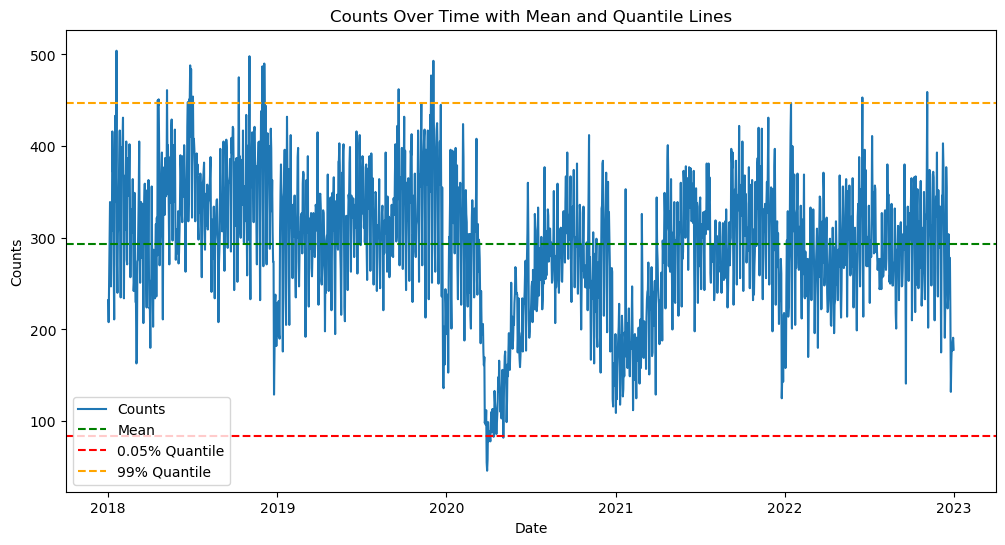

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by date and calculate counts
grouped_data = data_copy.groupby('date').size().reset_index(name='counts')

# Calculate mean and 5% and 95% quantiles
mean_count = grouped_data['counts'].mean()
quantile_5_percent = grouped_data['counts'].quantile(0.005)
quantile_95_percent = grouped_data['counts'].quantile(0.99)

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['date'], grouped_data['counts'], color='tab:blue', label='Counts')
plt.axhline(y=mean_count, color='green', linestyle='--', label='Mean')
plt.axhline(y=quantile_5_percent, color='red', linestyle='--', label='0.05% Quantile')
plt.axhline(y=quantile_95_percent, color='orange', linestyle='--', label='99% Quantile')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Counts Over Time with Mean and Quantile Lines')
plt.legend()
plt.show()


In [98]:
# Filter entries below the lower quantile
below_lower_quantile = grouped_data[grouped_data['counts'] < quantile_5_percent]

# Filter entries above the upper quantile
above_upper_quantile = grouped_data[grouped_data['counts'] > quantile_95_percent]

# Display the identified entries
print("Entries below the lower quantile:")
print(below_lower_quantile)

print("\nEntries above the upper quantile:")
print(above_upper_quantile)


Entries below the lower quantile:
          date  counts
817 2020-03-28      55
818 2020-03-29      46
819 2020-03-30      58
821 2020-04-01      78
823 2020-04-03      81
824 2020-04-04      84
825 2020-04-05      78
832 2020-04-12      83
833 2020-04-13      84
853 2020-05-03      82

Entries above the upper quantile:
           date  counts
18   2018-01-19     504
107  2018-04-18     450
109  2018-04-20     451
127  2018-05-08     461
172  2018-06-22     448
175  2018-06-25     451
177  2018-06-27     488
179  2018-06-29     484
183  2018-07-03     454
282  2018-10-10     475
305  2018-11-02     498
333  2018-11-30     487
337  2018-12-04     490
627  2019-09-20     462
697  2019-11-29     477
702  2019-12-04     493
1628 2022-06-17     453
1768 2022-11-04     459


In [151]:
# Assuming 'data_copy' is your DataFrame
# Convert 'date' column to datetime format if not done already

# Filter entries for January 19, 2018
casualties_on_2018_01_19 = data_copy[data_copy['date'] == '2018-01-19']

# Sum the 'number_of_casualties' column for that date
total_casualties_on_2018_01_19 = casualties_on_2018_01_19['number_of_casualties'].sum()

print(f'Total casualties on 2018-01-19: {total_casualties_on_2018_01_19}')




Total casualties on 2018-01-19: 631


In [152]:
# Assuming 'data_copy' is your DataFrame
# Convert 'date' column to datetime format if not done already
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Filter entries for March 29, 2020
casualties_on_2020_03_29 = data_copy[data_copy['date'] == '2020-03-29']

# Sum the 'number_of_casualties' column for that date
total_casualties_on_2020_03_29 = casualties_on_2020_03_29['number_of_casualties'].sum()

print(f'Total casualties on 2020-03-29: {total_casualties_on_2020_03_29}')


Total casualties on 2020-03-29: 57


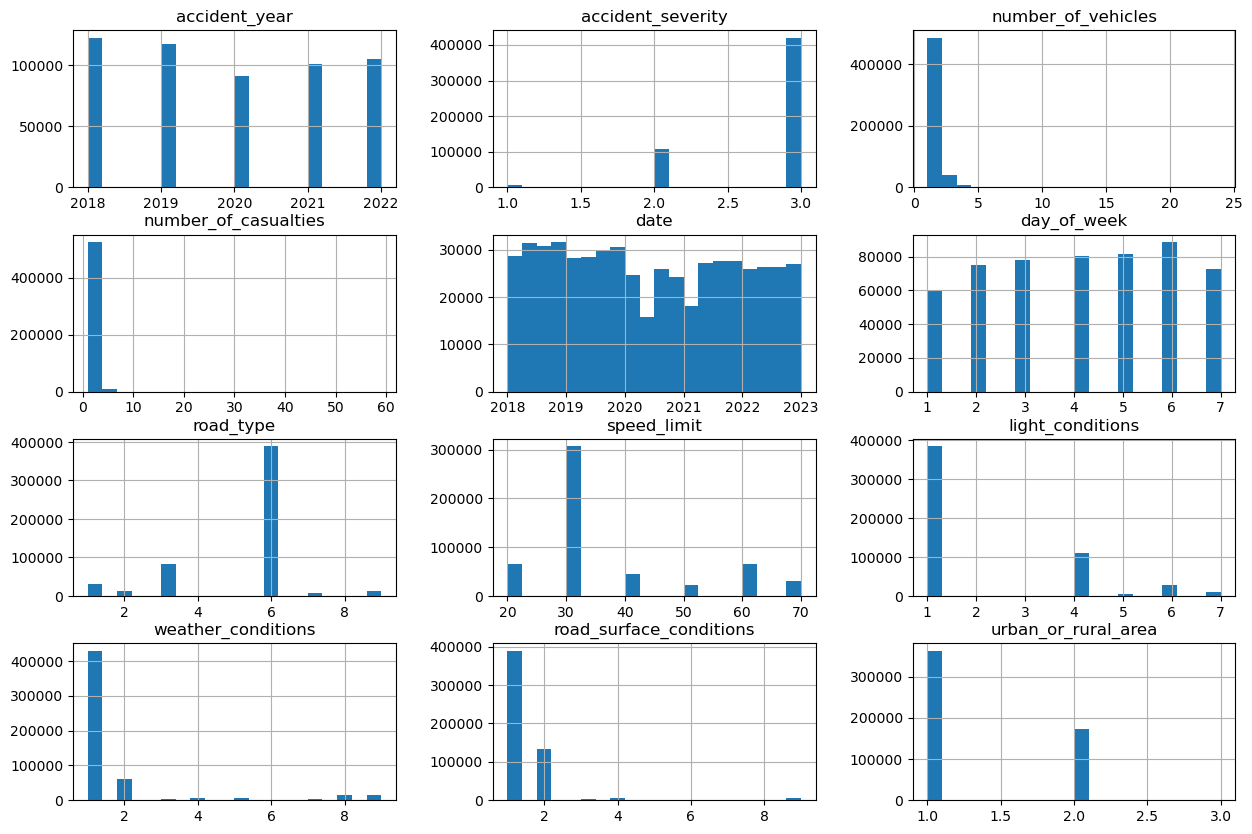

In [99]:
import matplotlib.pyplot as plt

data_copy.hist(bins=20, figsize=(15, 10))
plt.show()


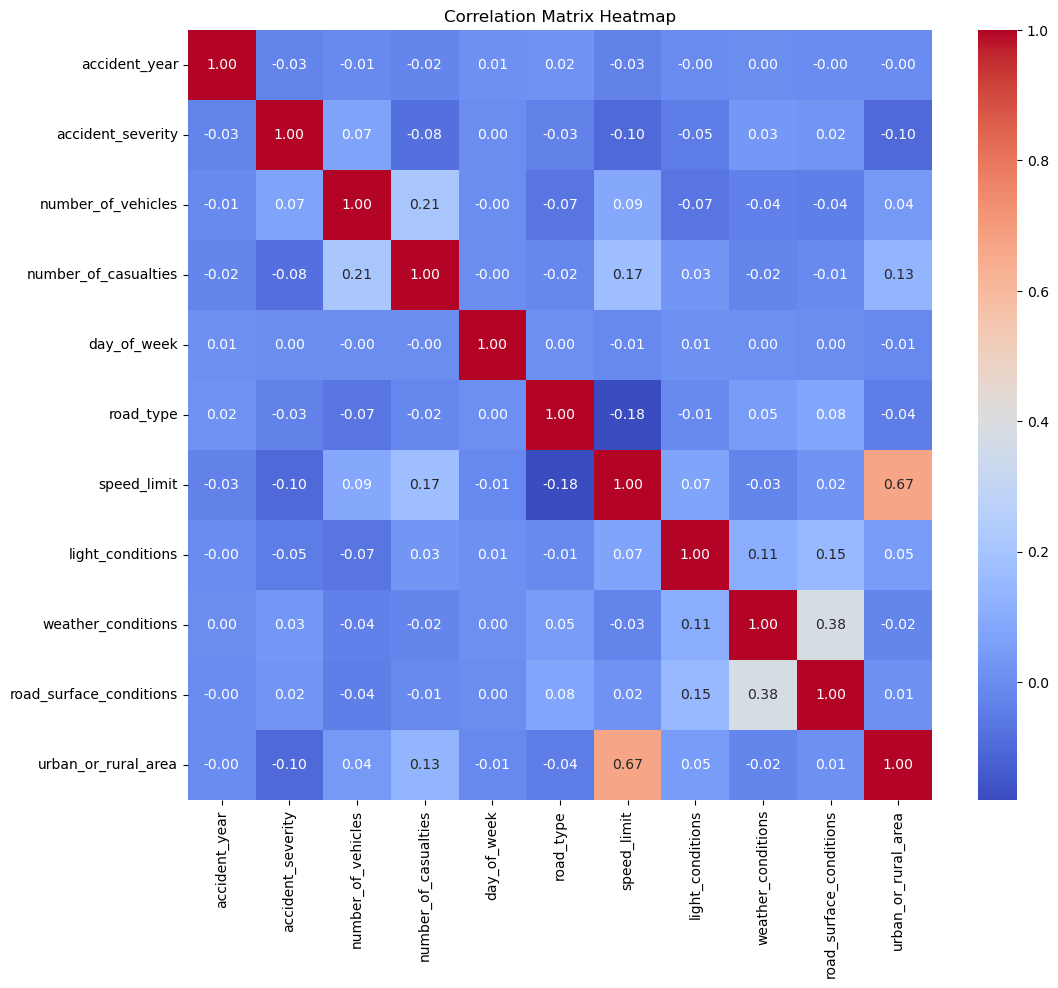

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_copy is your DataFrame
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()





In [101]:
#Spatial Analysis and Hotspots:

In [102]:
district_counts = data_copy['district_name'].value_counts()

# Display the counts
district_counts


district_name
Birmingham            11529
Leeds                  6984
Westminster            6483
Lambeth                5894
Tower Hamlets          5309
                      ...  
Clackmannanshire        135
Na h-Eileanan Siar       87
Orkney Islands           70
Shetland Islands         59
Isles of Scilly           5
Name: count, Length: 362, dtype: int64

In [103]:
number_of_districts = data_copy['district_name'].nunique()
print(f'Total Number of Districts: {number_of_districts}')


Total Number of Districts: 362


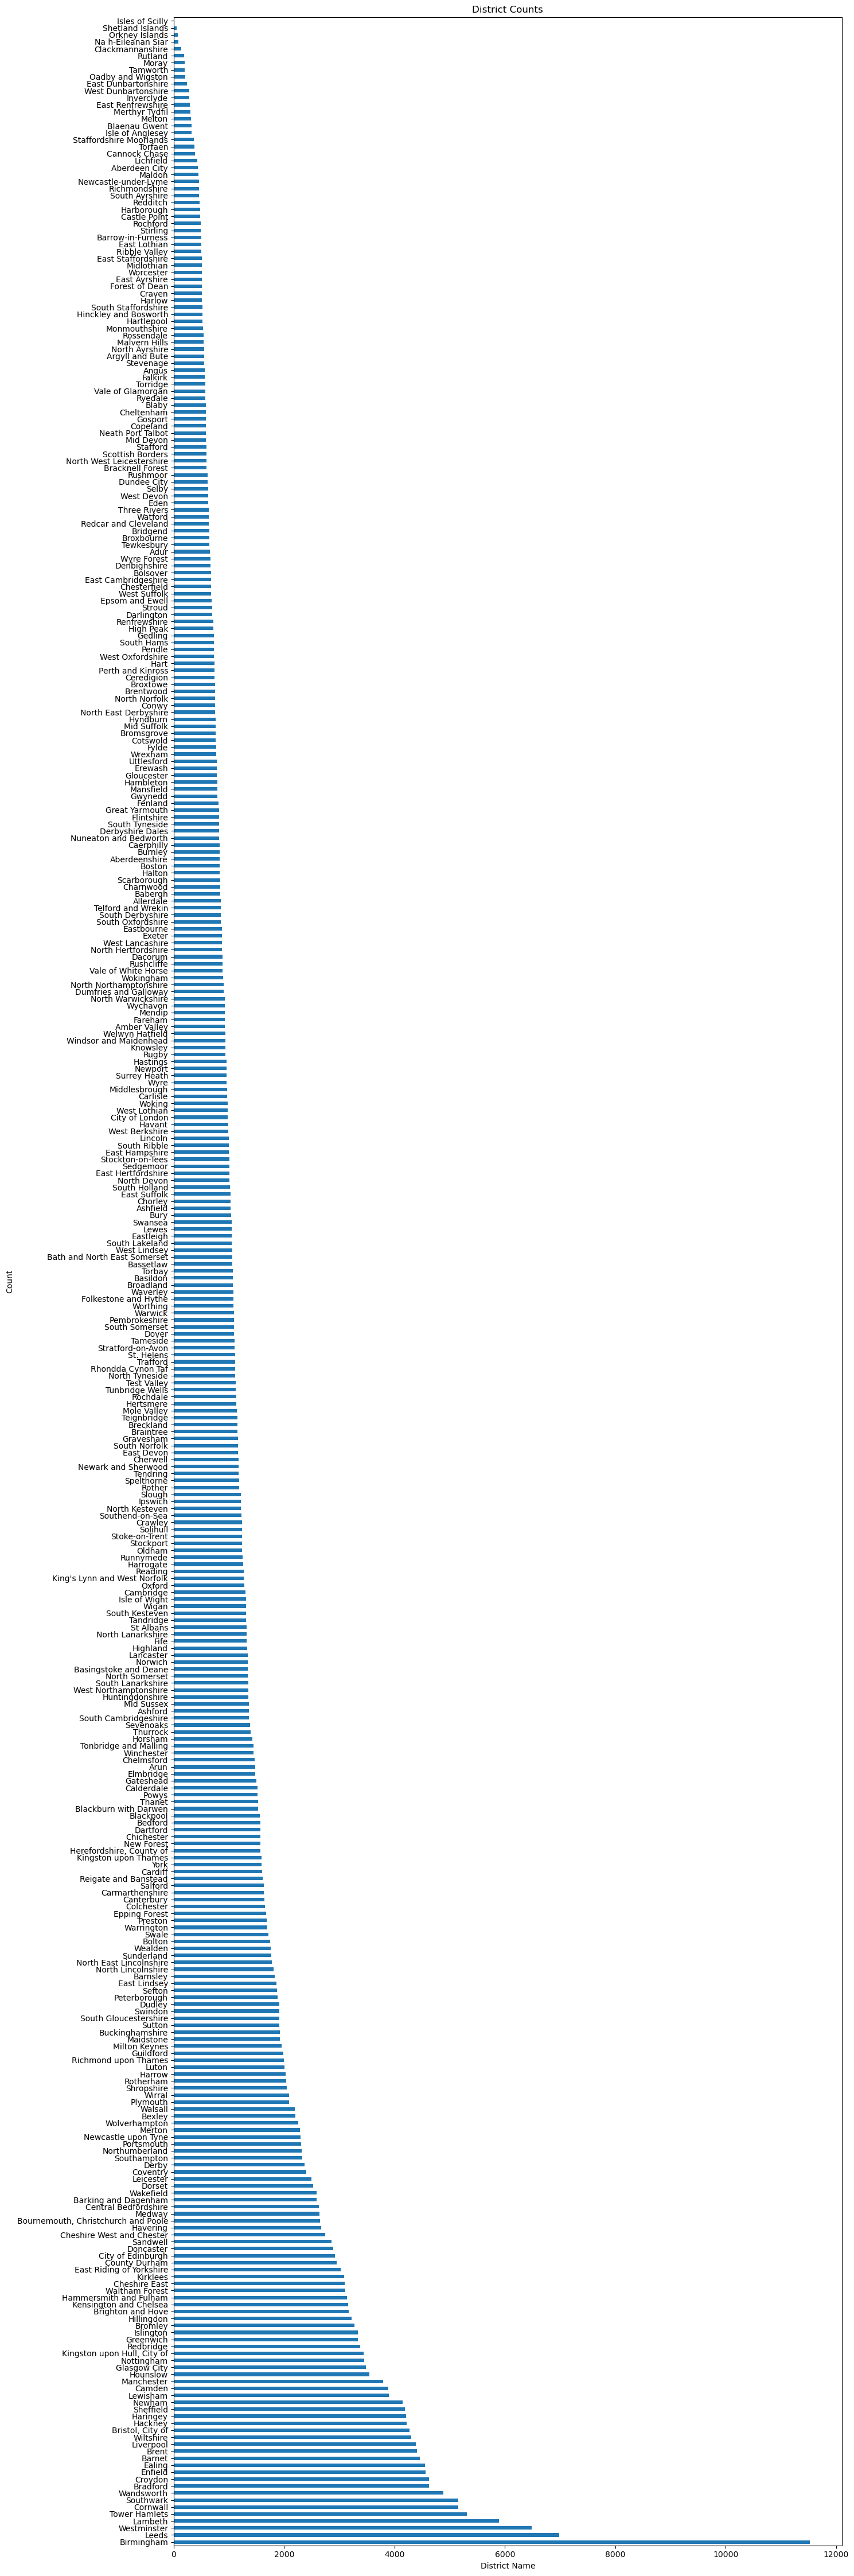

In [104]:
import matplotlib.pyplot as plt

# Plotting with rotated labels
plt.figure(figsize=(15, 45))  # Adjust the figure size as needed
district_counts.plot(kind='barh')
plt.title('District Counts')
plt.xlabel('District Name')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()






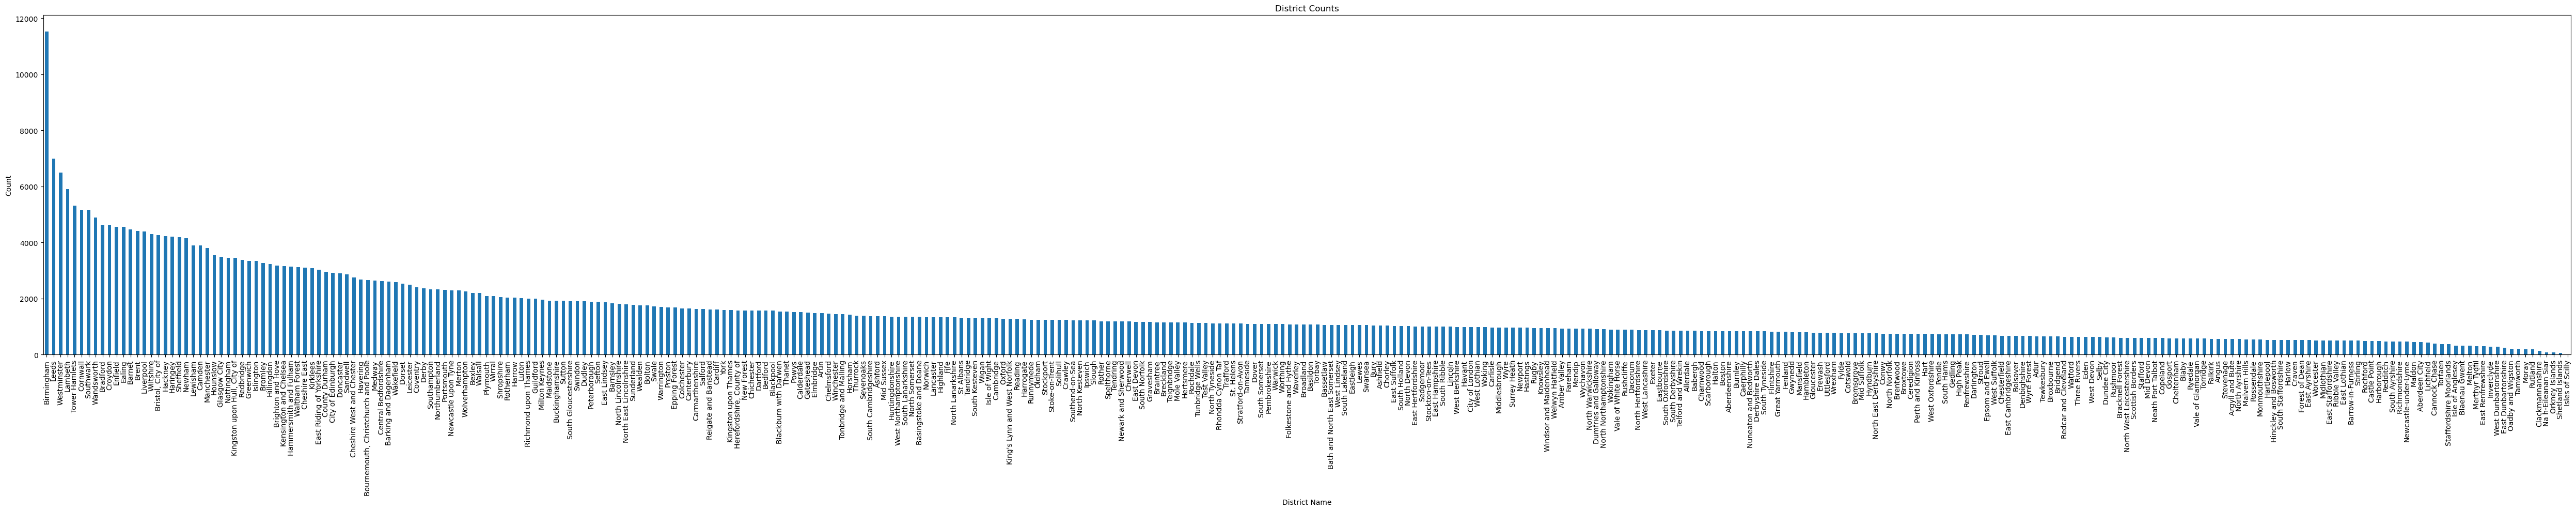

In [105]:
import matplotlib.pyplot as plt

# Plotting with rotated labels
plt.figure(figsize=(50, 10))  # Adjust the figure size as needed
district_counts.plot(kind='bar')  # Change 'barh' to 'bar'
plt.title('District Counts')
plt.xlabel('District Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [106]:
district_boundaries = gpd.read_file('hej.geojson')

# Check the column names of your GeoDataFrame
print(district_boundaries.columns)

Index(['OBJECTID', 'LAD22CD', 'LAD22NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry'],
      dtype='object')


In [107]:
unique_lad22nm = district_boundaries['LAD22NM'].unique()
print(unique_lad22nm)


['Hartlepool' 'Middlesbrough' 'Redcar and Cleveland' 'Stockton-on-Tees'
 'Darlington' 'Halton' 'Warrington' 'Blackburn with Darwen' 'Blackpool'
 'Kingston upon Hull, City of' 'East Riding of Yorkshire'
 'North East Lincolnshire' 'North Lincolnshire' 'York' 'Derby' 'Leicester'
 'Rutland' 'Nottingham' 'Herefordshire, County of' 'Telford and Wrekin'
 'Stoke-on-Trent' 'Bath and North East Somerset' 'Bristol, City of'
 'North Somerset' 'South Gloucestershire' 'Plymouth' 'Torbay' 'Swindon'
 'Peterborough' 'Luton' 'Southend-on-Sea' 'Thurrock' 'Medway'
 'Bracknell Forest' 'West Berkshire' 'Reading' 'Slough'
 'Windsor and Maidenhead' 'Wokingham' 'Milton Keynes' 'Brighton and Hove'
 'Portsmouth' 'Southampton' 'Isle of Wight' 'County Durham'
 'Cheshire East' 'Cheshire West and Chester' 'Shropshire' 'Cornwall'
 'Isles of Scilly' 'Wiltshire' 'Bedford' 'Central Bedfordshire'
 'Northumberland' 'Bournemouth, Christchurch and Poole' 'Dorset'
 'Buckinghamshire' 'North Northamptonshire' 'West Northampton

In [108]:
unique_district_names = data_copy['district_name'].unique()
print(unique_district_names)


['Camden' 'Newham' 'Islington' 'Greenwich' 'Barnet'
 'Kensington and Chelsea' 'Lewisham' 'Brent' 'Tower Hamlets' 'Hounslow'
 'Harrow' 'Southwark' 'Lambeth' 'Ealing' 'Wandsworth' 'Hackney' 'Haringey'
 'Richmond upon Thames' 'Enfield' 'Sutton' 'Waltham Forest' 'Redbridge'
 'Hammersmith and Fulham' 'Barking and Dagenham' 'Merton' 'Croydon'
 'Hillingdon' 'Havering' 'Bromley' 'Westminster' 'Bexley'
 'Kingston upon Thames' nan 'City of London' 'Carlisle' 'Allerdale'
 'South Lakeland' 'Barrow-in-Furness' 'Eden' 'Copeland' 'Blackpool'
 'Blackburn with Darwen' 'Hyndburn' 'Ribble Valley' 'South Ribble'
 'Burnley' 'Rossendale' 'Pendle' 'Preston' 'Chorley' 'West Lancashire'
 'Fylde' 'Lancaster' 'Wyre' 'Knowsley' 'Liverpool' 'Wirral' 'Sefton'
 'St. Helens' 'Manchester' 'Salford' 'Tameside' 'Stockport' 'Bolton'
 'Wigan' 'Trafford' 'Bury' 'Rochdale' 'Oldham' 'Warrington'
 'Cheshire East' 'Cheshire West and Chester' 'Halton'
 'Newcastle upon Tyne' 'Northumberland' 'North Tyneside' 'South Tyneside'
 'S

In [109]:
# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame

# Extract unique district names from data_copy
unique_district_names = set(data_copy['district_name'].unique())

# Extract unique 'LAD22NM' values from district_boundaries
unique_lad22nm = set(district_boundaries['LAD22NM'].unique())

# Find differences
missing_in_data_copy = unique_lad22nm - unique_district_names
missing_in_district_boundaries = unique_district_names - unique_lad22nm

# Print the differences
print("Names in data_copy but not in district_boundaries:", missing_in_district_boundaries)
print("Names in district_boundaries but not in data_copy:", missing_in_data_copy)


Names in data_copy but not in district_boundaries: {nan}
Names in district_boundaries but not in data_copy: {'Lisburn and Castlereagh', 'Belfast', 'Newry, Mourne and Down', 'Fermanagh and Omagh', 'Mid and East Antrim', 'Derry City and Strabane', 'Antrim and Newtownabbey', 'Somerset West and Taunton', 'Armagh City, Banbridge and Craigavon', 'Ards and North Down', 'Causeway Coast and Glens', 'Mid Ulster'}


In [110]:
district_boundaries.head()

OBJECTID    LAD22CD               LAD22NM   BNG_E   BNG_N     LONG  \
0         1  E06000001            Hartlepool  447160  531474 -1.27018   
1         2  E06000002         Middlesbrough  451141  516887 -1.21099   
2         3  E06000003  Redcar and Cleveland  464361  519597 -1.00608   
3         4  E06000004      Stockton-on-Tees  444940  518183 -1.30664   
4         5  E06000005            Darlington  428029  515648 -1.56835   

        LAT                              GlobalID  \
0  54.67614  2efc9848-300e-4ef3-a36e-58d6856b9817   
1  54.54467  6d66b015-1f67-40f6-b239-15911fa03834   
2  54.56752  a5a6513f-916e-4769-bed2-cd019d18719a   
3  54.55691  14e8450b-7e7c-479a-a335-095ac2d9a701   
4  54.53534  2f212ecf-daf5-4171-b9c6-825c0d33e5af   

                                            geometry  
0  POLYGON ((447213.899 537036.104, 447228.798 53...  
1  POLYGON ((448489.897 522071.798, 448592.597 52...  
2  POLYGON ((455525.931 528406.654, 455724.632 52...  
3  POLYGON ((444157.002 527956.304, 444165.898 52...  
4  POLYGON ((423496.602 524724.299, 423497.204 52...

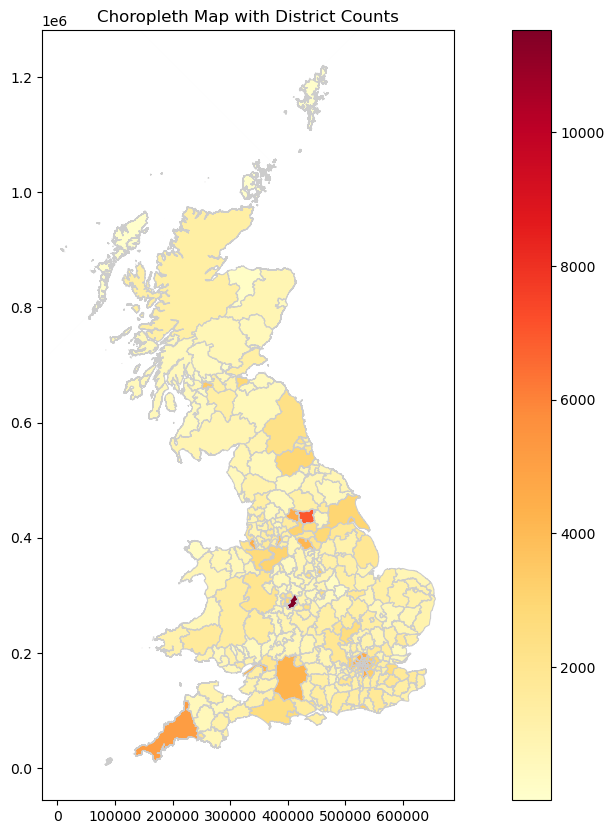

In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=[merged_data.columns[-1]])

# Plot the choropleth map with yellow to red color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column=merged_data.columns[-1], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Choropleth Map with District Counts')

# Show the plot
plt.show()






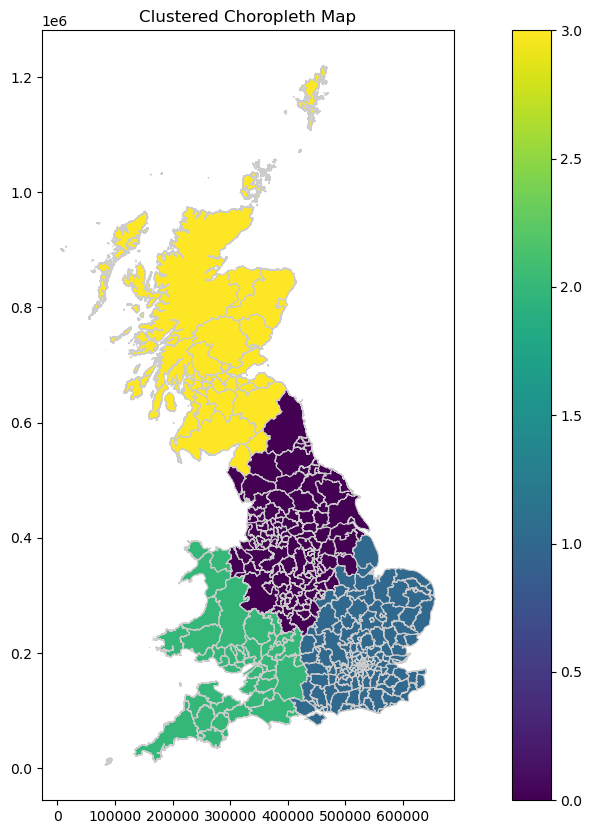

Silhouette Score for 4 clusters: 0.48891872940790215


In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=[merged_data.columns[-1]])

# Feature scaling (normalize the counts)
merged_data['normalized_counts'] = merged_data[merged_data.columns[-1]] / merged_data[merged_data.columns[-1]].max()

# Feature matrix
X = merged_data[['LAT', 'LONG', 'normalized_counts']]

# Choose the number of clusters (start with 3)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X)

# Plot the clustered choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Clustered Choropleth Map')

# Show the plot
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, merged_data['cluster'])
print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')




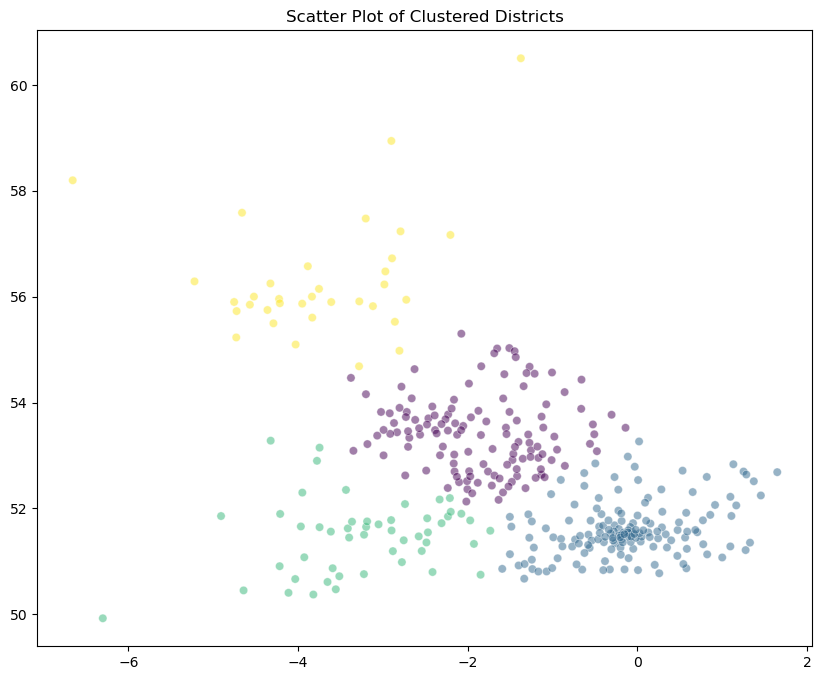

Silhouette Score for 4 clusters: 0.48891872940790215


In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=[merged_data.columns[-1]])

# Feature scaling (normalize the counts)
merged_data['normalized_counts'] = merged_data[merged_data.columns[-1]] / merged_data[merged_data.columns[-1]].max()

# Feature matrix
X = merged_data[['LAT', 'LONG', 'normalized_counts']]

# Choose the number of clusters (start with 3)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10, 8))

# Plot all points
plt.scatter(X['LONG'], X['LAT'], c=merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)

# Set plot title
plt.title('Scatter Plot of Clustered Districts')

# Show the plot
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, merged_data['cluster'])
print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')


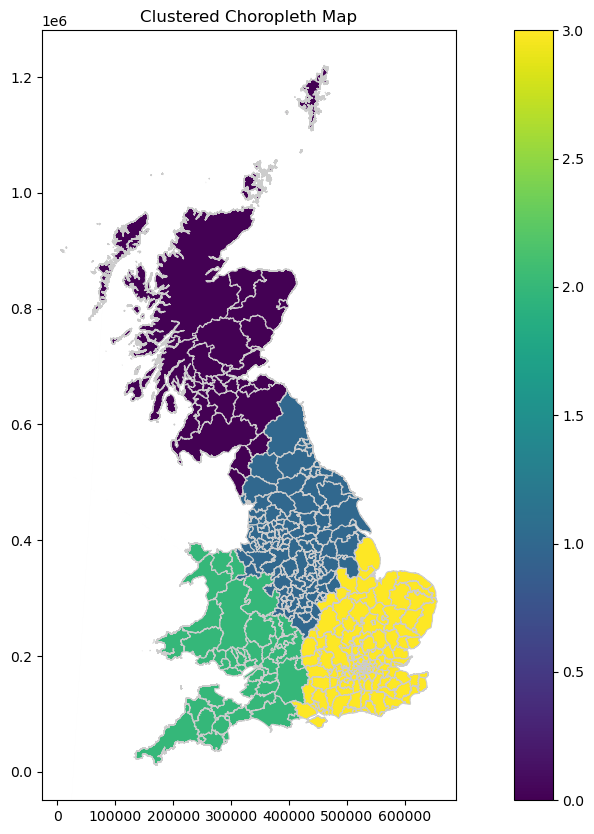

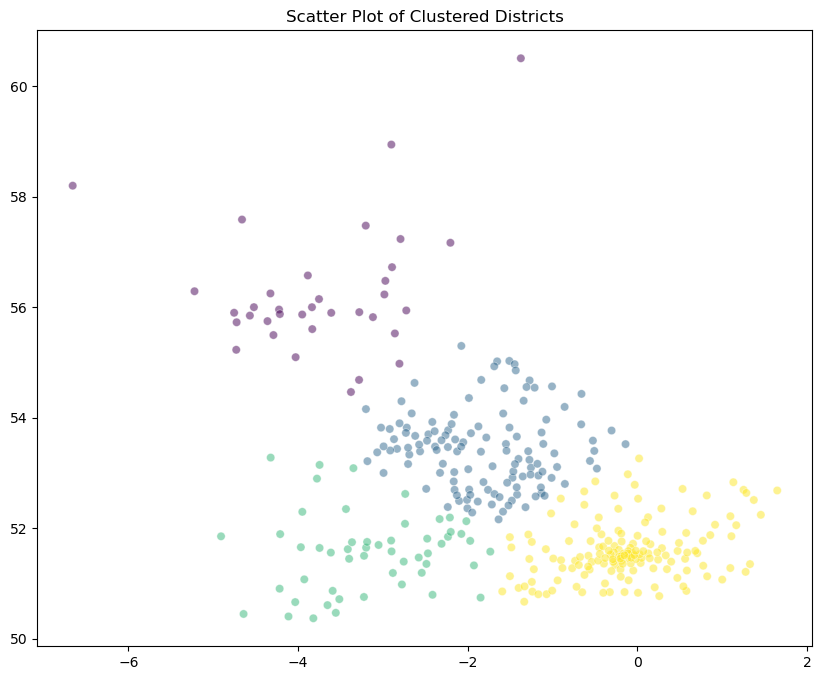

Silhouette Score for 4 clusters: 0.4858447887976122


In [161]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=[merged_data.columns[-1]])

# Feature scaling (normalize the counts)
merged_data['normalized_counts'] = merged_data[merged_data.columns[-1]] / merged_data[merged_data.columns[-1]].max()

# Feature matrix
X = merged_data[['LAT', 'LONG', 'normalized_counts']]

# Choose the number of clusters (start with 3)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(X)

# Plot the clustered choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Clustered Choropleth Map')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X['LONG'], X['LAT'], c=merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Clustered Districts')
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, merged_data['cluster'])
print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')


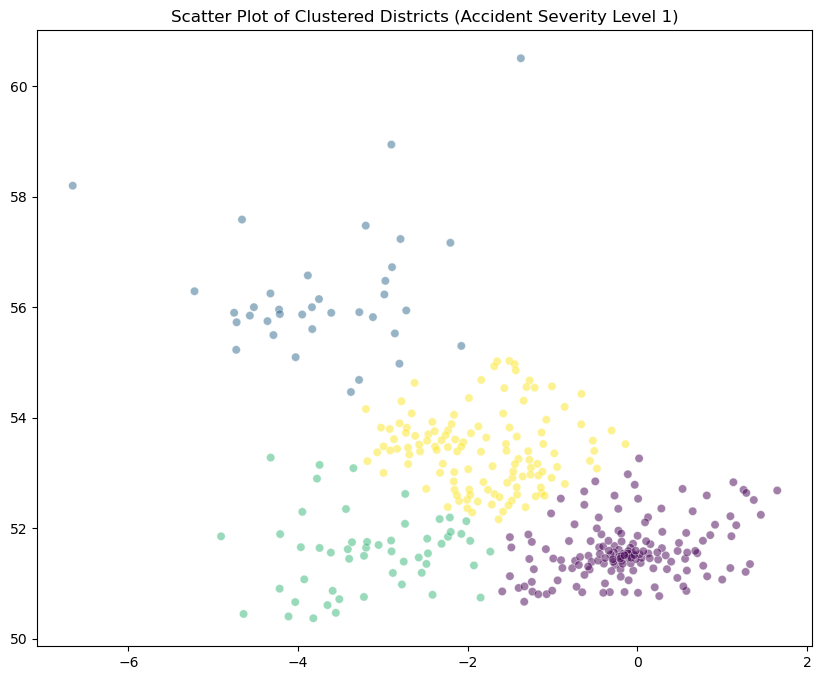

Silhouette Score for 4 clusters: 0.4836085974305235


In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data_original = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data_original = merged_data_original.dropna(subset=[merged_data_original.columns[-1]])

# Feature scaling (normalize the counts)
merged_data_original['normalized_counts'] = merged_data_original[merged_data_original.columns[-1]] / merged_data_original[merged_data_original.columns[-1]].max()

# Feature matrix
X_original = merged_data_original[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters_original = 4

# Perform K-means clustering
kmeans_original = KMeans(n_clusters=num_clusters_original, random_state=42)
merged_data_original['cluster'] = kmeans_original.fit_predict(X_original)

# Create a new DataFrame for merged data
new_merged_data = merged_data_original.copy()

# Scatter plot
plt.figure(figsize=(10, 8))

# Plot all points
plt.scatter(X_original['LONG'], X_original['LAT'], c=new_merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)

# Set plot title
plt.title('Scatter Plot of Clustered Districts (Accident Severity Level 1)')

# Show the plot
plt.show()

# Calculate silhouette score
silhouette_avg_original = silhouette_score(X_original, new_merged_data['cluster'])
print(f'Silhouette Score for {num_clusters_original} clusters: {silhouette_avg_original}')



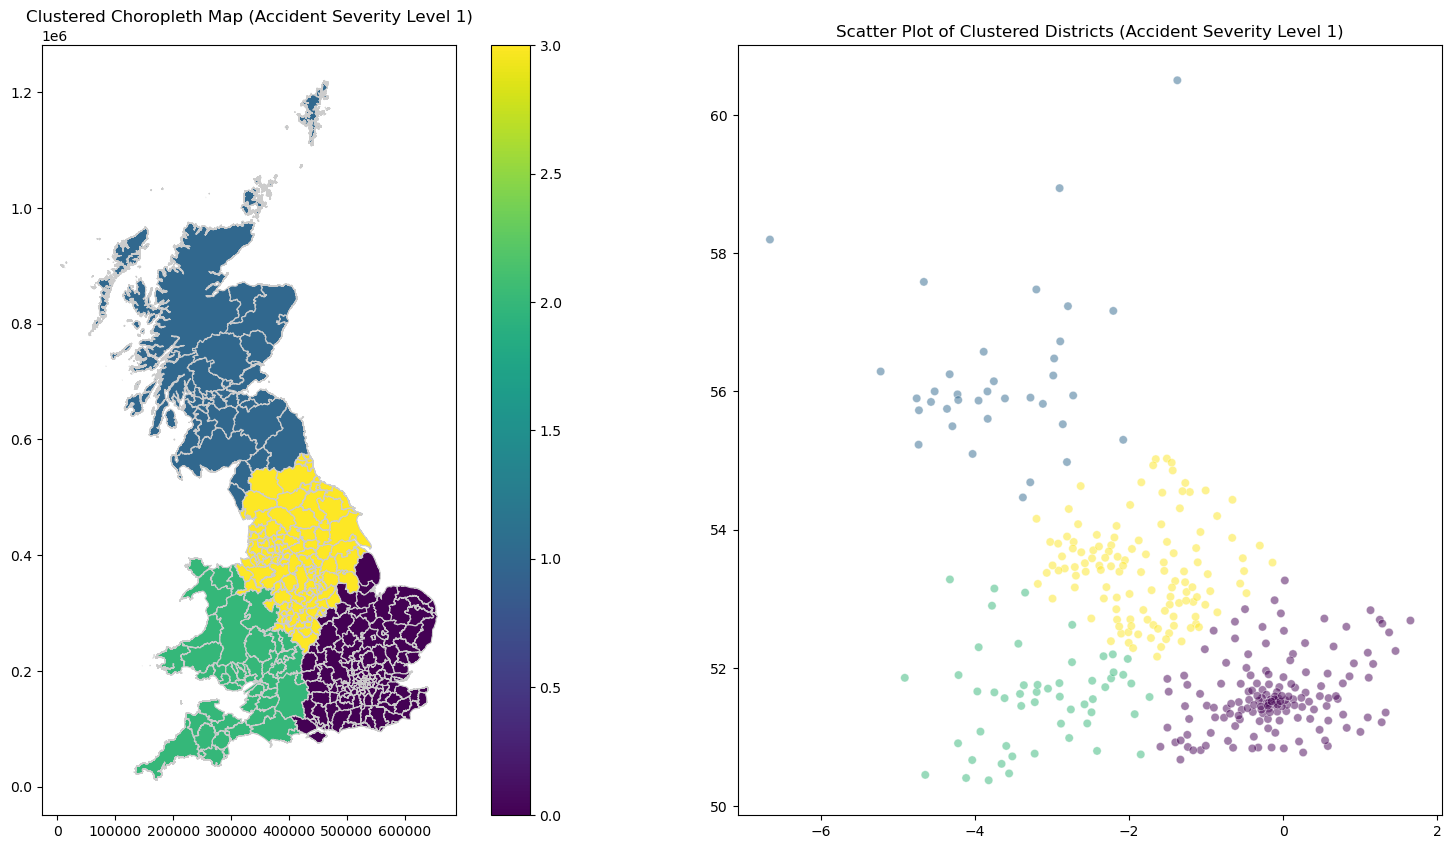

Silhouette Score for 4 clusters: 0.4836085974305235


In [163]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data_original = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data_original = merged_data_original.dropna(subset=[merged_data_original.columns[-1]])

# Feature scaling (normalize the counts)
merged_data_original['normalized_counts'] = merged_data_original[merged_data_original.columns[-1]] / merged_data_original[merged_data_original.columns[-1]].max()

# Feature matrix
X_original = merged_data_original[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters_original = 4

# Perform K-means clustering
kmeans_original = KMeans(n_clusters=num_clusters_original, random_state=42)
merged_data_original['cluster'] = kmeans_original.fit_predict(X_original)

# Create a new DataFrame for merged data
new_merged_data = merged_data_original.copy()

# Plot the clustered choropleth map
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Added a subplot for side-by-side visualization

# Plot the clustered choropleth map
new_merged_data.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Clustered Choropleth Map (Accident Severity Level 1)')

# Scatter plot
ax[1].scatter(X_original['LONG'], X_original['LAT'], c=new_merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)
ax[1].set_title('Scatter Plot of Clustered Districts (Accident Severity Level 1)')

# Show the plots
plt.show()

# Calculate silhouette score
silhouette_avg_original = silhouette_score(X_original, new_merged_data['cluster'])
print(f'Silhouette Score for {num_clusters_original} clusters: {silhouette_avg_original}')


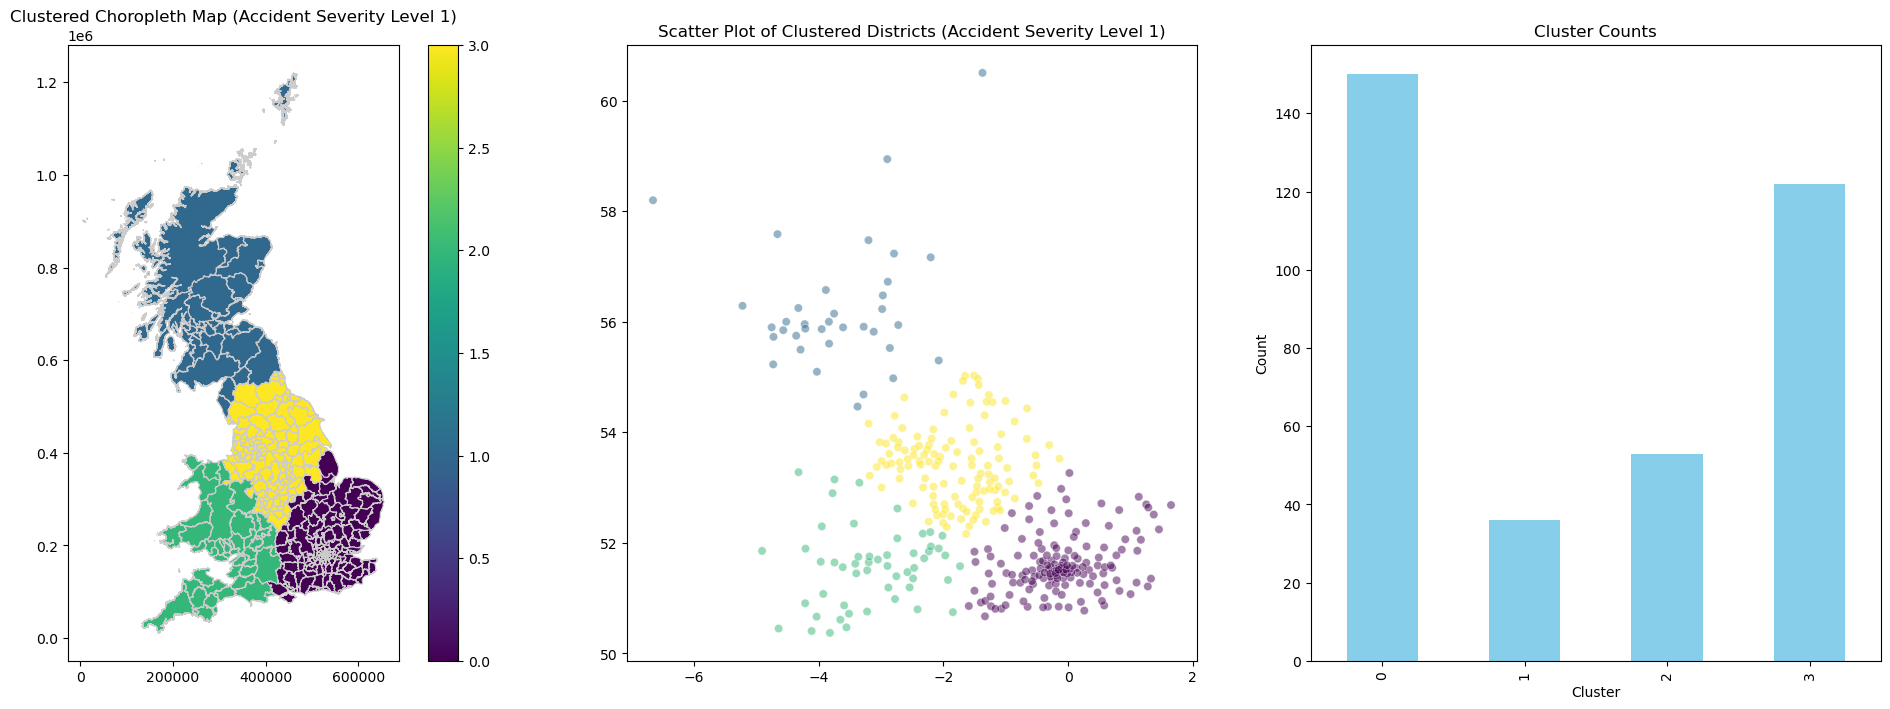

Silhouette Score for 4 clusters: 0.4836085974305235
Cluster Counts:
cluster
0    150
1     36
2     53
3    122
Name: count, dtype: int64


In [164]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data_original = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data_original = merged_data_original.dropna(subset=[merged_data_original.columns[-1]])

# Feature scaling (normalize the counts)
merged_data_original['normalized_counts'] = merged_data_original[merged_data_original.columns[-1]] / merged_data_original[merged_data_original.columns[-1]].max()

# Feature matrix
X_original = merged_data_original[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters_original = 4

# Perform K-means clustering
kmeans_original = KMeans(n_clusters=num_clusters_original, random_state=42)
merged_data_original['cluster'] = kmeans_original.fit_predict(X_original)

# Create a new DataFrame for merged data
new_merged_data = merged_data_original.copy()

# Plot the clustered choropleth map and scatter plot
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Plot the clustered choropleth map
new_merged_data.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Clustered Choropleth Map (Accident Severity Level 1)')

# Scatter plot
axs[1].scatter(X_original['LONG'], X_original['LAT'], c=new_merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)
axs[1].set_title('Scatter Plot of Clustered Districts (Accident Severity Level 1)')

# Bar plot for cluster counts
cluster_counts = new_merged_data['cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='skyblue', ax=axs[2])
axs[2].set_title('Cluster Counts')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Count')

# Show the plots
plt.show()

# Calculate silhouette score
silhouette_avg_original = silhouette_score(X_original, new_merged_data['cluster'])
print(f'Silhouette Score for {num_clusters_original} clusters: {silhouette_avg_original}')

# Display cluster counts
print("Cluster Counts:")
print(cluster_counts)


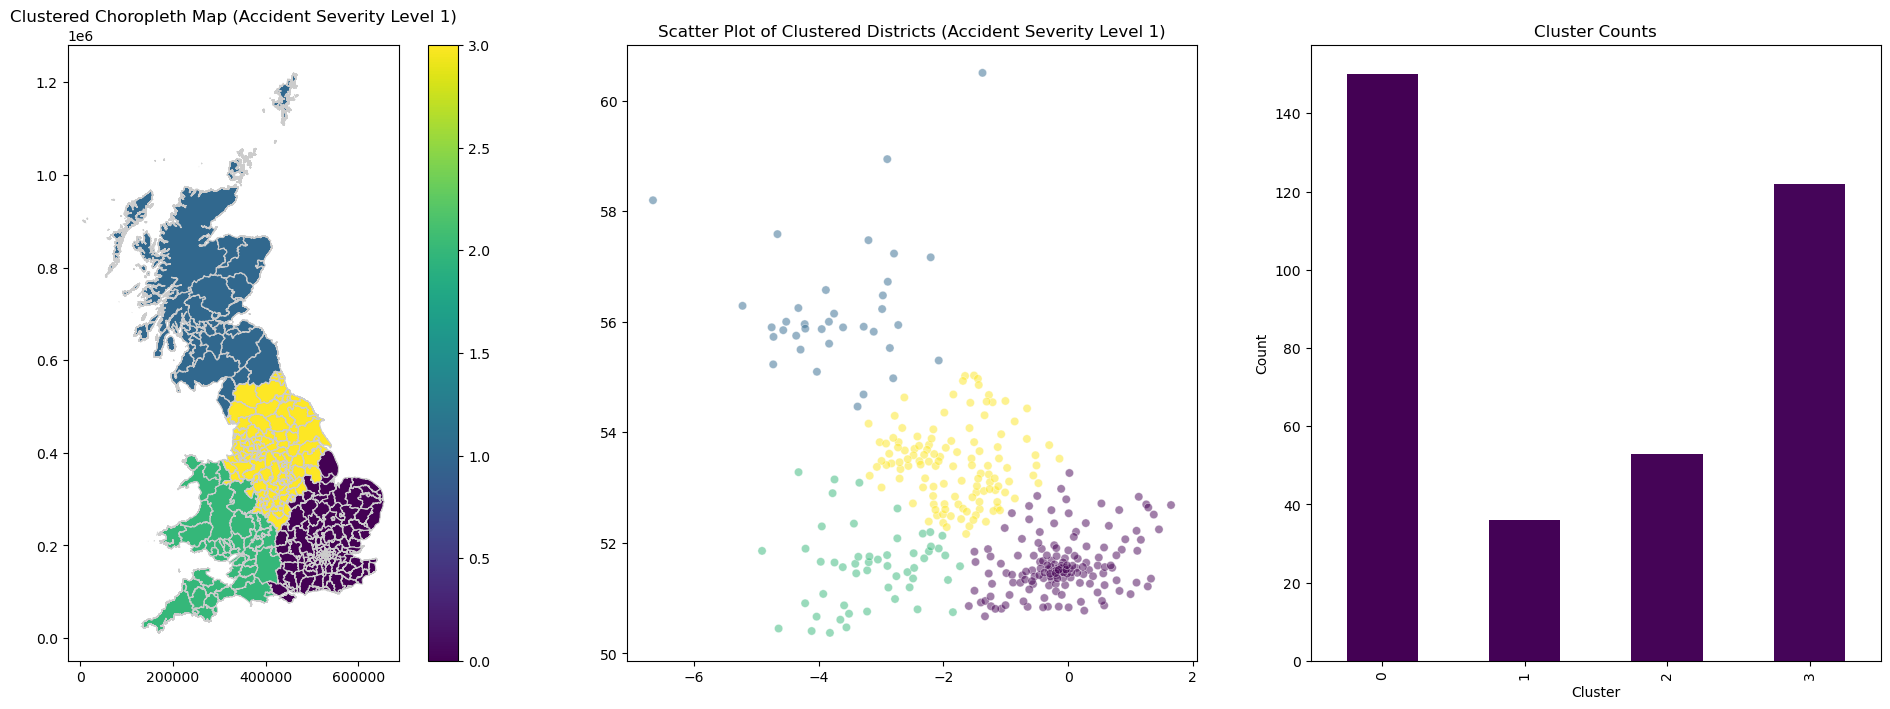

Silhouette Score for 4 clusters: 0.4836085974305235
Cluster Counts:
cluster
0    150
1     36
2     53
3    122
Name: count, dtype: int64


In [165]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data_original = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data_original = merged_data_original.dropna(subset=[merged_data_original.columns[-1]])

# Feature scaling (normalize the counts)
merged_data_original['normalized_counts'] = merged_data_original[merged_data_original.columns[-1]] / merged_data_original[merged_data_original.columns[-1]].max()

# Feature matrix
X_original = merged_data_original[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters_original = 4

# Perform K-means clustering
kmeans_original = KMeans(n_clusters=num_clusters_original, random_state=42)
merged_data_original['cluster'] = kmeans_original.fit_predict(X_original)

# Create a new DataFrame for merged data
new_merged_data = merged_data_original.copy()

# Plot the clustered choropleth map and scatter plot
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Plot the clustered choropleth map
new_merged_data.plot(column='cluster', cmap='viridis', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Clustered Choropleth Map (Accident Severity Level 1)')

# Scatter plot
axs[1].scatter(X_original['LONG'], X_original['LAT'], c=new_merged_data['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)
axs[1].set_title('Scatter Plot of Clustered Districts (Accident Severity Level 1)')

# Bar plot for cluster counts with cluster colors
cluster_counts.plot(kind='bar', color=plt.cm.viridis.colors, ax=axs[2])
axs[2].set_title('Cluster Counts')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Count')

# Show the plots
plt.show()

# Calculate silhouette score
silhouette_avg_original = silhouette_score(X_original, new_merged_data['cluster'])
print(f'Silhouette Score for {num_clusters_original} clusters: {silhouette_avg_original}')

# Display cluster counts
print("Cluster Counts:")
print(cluster_counts)


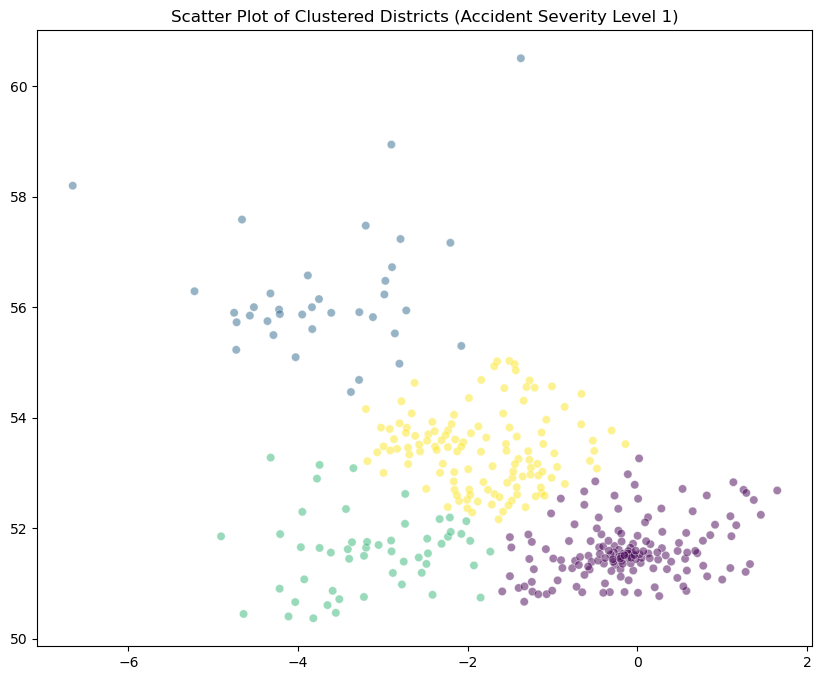

Silhouette Score for 4 clusters: 0.4836085974305235
   cluster  observation_count
0        0                150
1        3                122
2        2                 53
3        1                 36


In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
district_boundaries = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
district_boundaries = district_boundaries.dropna(subset=[district_boundaries.columns[-1]])

# Feature scaling (normalize the counts)
district_boundaries['normalized_counts'] = district_boundaries[district_boundaries.columns[-1]] / district_boundaries[district_boundaries.columns[-1]].max()

# Feature matrix
X = district_boundaries[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
district_boundaries['cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.figure(figsize=(10, 8))

# Plot all points
plt.scatter(X['LONG'], X['LAT'], c=district_boundaries['cluster'], cmap='viridis', alpha=0.5, marker='o', edgecolors='w', linewidth=0.5)

# Set plot title
plt.title('Scatter Plot of Clustered Districts (Accident Severity Level 1)')

# Show the plot
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(X, district_boundaries['cluster'])
print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')

# Count number of observations per cluster
observations_per_cluster = district_boundaries['cluster'].value_counts().reset_index()
observations_per_cluster.columns = ['cluster', 'observation_count']
print(observations_per_cluster)



In [116]:
print(len(severity_1_data))  # Check the number of entries for severity level 1


7785


In [117]:
# Assuming 'cluster' is the column representing the clusters in your merged_data DataFrame
cluster_counts = merged_data_original['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'observation_count']

# Calculate the percentage of each cluster
total_observations = len(merged_data_original)
cluster_counts['percentage'] = (cluster_counts['observation_count'] / total_observations) * 100

# Display the result
print(cluster_counts)





   cluster  observation_count  percentage
0        0                150   41.551247
1        3                122   33.795014
2        2                 53   14.681440
3        1                 36    9.972299


In [118]:
# Assuming your DataFrame is named data_copy
severity_counts = data_copy['accident_severity'].value_counts().reset_index()
severity_counts.columns = ['accident_severity', 'total_counts']

# Display the result
print(severity_counts)


   accident_severity  total_counts
0                  3        419972
1                  2        108680
2                  1          7785


In [119]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Assuming district_boundaries is your GeoDataFrame
# You can keep the rest of the code the same, just replace 'data_copy' with 'severity_1_data' for filtering

# Assuming severity_1_data is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = severity_1_data['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data_original = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data_original = merged_data_original.dropna(subset=[merged_data_original.columns[-1]])

# Feature scaling (normalize the counts)
merged_data_original['normalized_counts'] = merged_data_original[merged_data_original.columns[-1]] / merged_data_original[merged_data_original.columns[-1]].max()

# Feature matrix
X_original = merged_data_original[['LAT', 'LONG', 'normalized_counts']]  # Change X to include 'LAT', 'LONG', and 'normalized_counts'

# Choose the number of clusters (start with 3)
num_clusters_original = 4

# Perform K-means clustering
kmeans_original = KMeans(n_clusters=num_clusters_original, random_state=42)
merged_data_original['cluster'] = kmeans_original.fit_predict(X_original)

# Create a new DataFrame for merged data
new_merged_data = merged_data_original.copy()

# Calculate the total counts for each cluster
cluster_counts = new_merged_data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'observation_count']

# Display the result
print(cluster_counts)


   cluster  observation_count
0        0                150
1        3                122
2        2                 53
3        1                 36


In [120]:
#Highest number of counts
# Sort the merged data by the count column
sorted_data = merged_data.sort_values(by=merged_data.columns[-1], ascending=False)

# Display the top districts
top_districts = sorted_data.head(20)
print(top_districts[['LAD22NM', merged_data.columns[-1]]])


                 LAD22NM  cluster
337             Stirling        3
347  East Dunbartonshire        3
64             Allerdale        3
350         Glasgow City        3
66              Carlisle        3
349    Perth and Kinross        3
348                 Fife        3
351    North Lanarkshire        3
346          Dundee City        3
339        Aberdeenshire        3
345                Angus        3
344         West Lothian        3
343  West Dunbartonshire        3
342         Renfrewshire        3
341    City of Edinburgh        3
340      Argyll and Bute        3
338        Aberdeen City        3
320     Clackmannanshire        3
336    South Lanarkshire        3
335       South Ayrshire        3


In [121]:
# Lowest number of counts
# Display the bottom districts
# Lowest number of counts
# Display the bottom districts
bottom_districts = sorted_data.tail(20)
print(bottom_districts[['LAD22NM', merged_data.columns[-1]]])



                     LAD22NM  cluster
172                Hambleton        0
173                Harrogate        0
174            Richmondshire        0
175                  Ryedale        0
176              Scarborough        0
177                    Selby        0
178                 Ashfield        0
180                 Broxtowe        0
199  Staffordshire Moorlands        0
1              Middlesbrough        0
182                Mansfield        0
183      Newark and Sherwood        0
184               Rushcliffe        0
193            Cannock Chase        0
194       East Staffordshire        0
195                Lichfield        0
196     Newcastle-under-Lyme        0
197      South Staffordshire        0
198                 Stafford        0
181                  Gedling        0


In [122]:
import pandas as pd
#Total number of casualties
# Assuming your DataFrame is named data_copy
# Group by 'district_name' and calculate the sum of 'number_of_casualties' for each district
casualties_by_district = data_copy.groupby('district_name')['number_of_casualties'].sum().reset_index()

# Sort the DataFrame by 'number_of_casualties' in descending order
casualties_by_district = casualties_by_district.sort_values(by='number_of_casualties', ascending=False)

# Display the result
casualties_by_district.head(20)




district_name  number_of_casualties
21         Birmingham                 15477
171             Leeds                  8990
74           Cornwall                  7385
346       Westminster                  7250
169           Lambeth                  6611
31           Bradford                  6175
321     Tower Hamlets                  6169
287         Southwark                  5782
348         Wiltshire                  5711
110           Enfield                  5620
80            Croydon                  5460
177         Liverpool                  5455
93             Ealing                  5435
330        Wandsworth                  5411
265         Sheffield                  5376
12             Barnet                  5302
204            Newham                  5171
34              Brent                  5097
182        Manchester                  4982
38   Bristol, City of                  4950

In [160]:
casualties_by_district.tail(20)

district_name  number_of_casualties
292  Staffordshire Moorlands                   534
0              Aberdeen City                   522
319                  Torfaen                   496
185                   Melton                   441
25             Blaenau Gwent                   436
187           Merthyr Tydfil                   431
159         Isle of Anglesey                   424
157               Inverclyde                   385
339      West Dunbartonshire                   371
102        East Renfrewshire                   366
97       East Dunbartonshire                   317
197                    Moray                   283
224        Oadby and Wigston                   281
255                  Rutland                   268
307                 Tamworth                   257
70          Clackmannanshire                   165
198       Na h-Eileanan Siar                   106
226           Orkney Islands                    90
266         Shetland Islands                    75
161          Isles of Scilly                     5

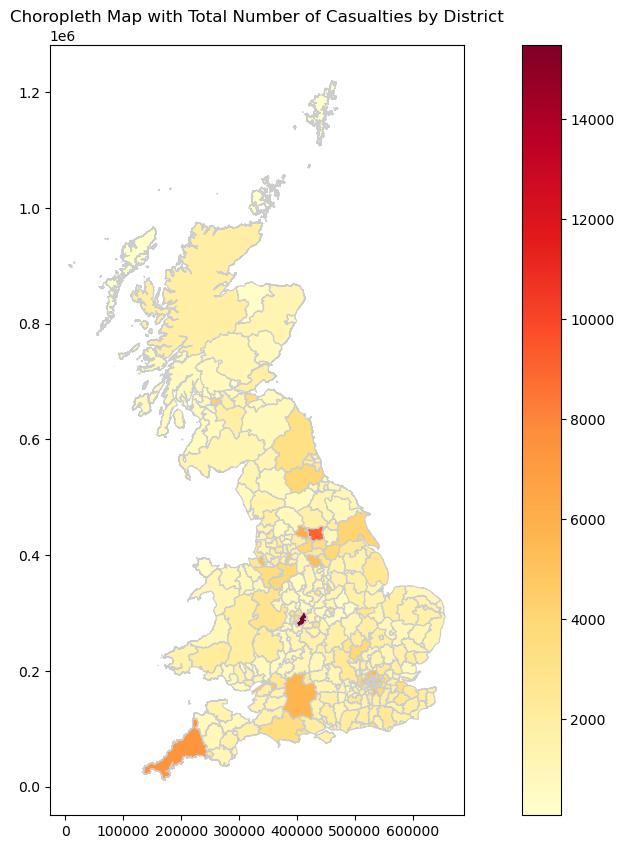

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy.groupby('district_name')['number_of_casualties'].sum().reset_index()

# Merge district_boundaries with the counts based on the 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_on='district_name', how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=['number_of_casualties'])

# Plot the choropleth map with yellow to red color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='number_of_casualties', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Choropleth Map with Total Number of Casualties by District')

# Show the plot
plt.show()


In [124]:
#Temporal Patterns and Severity:

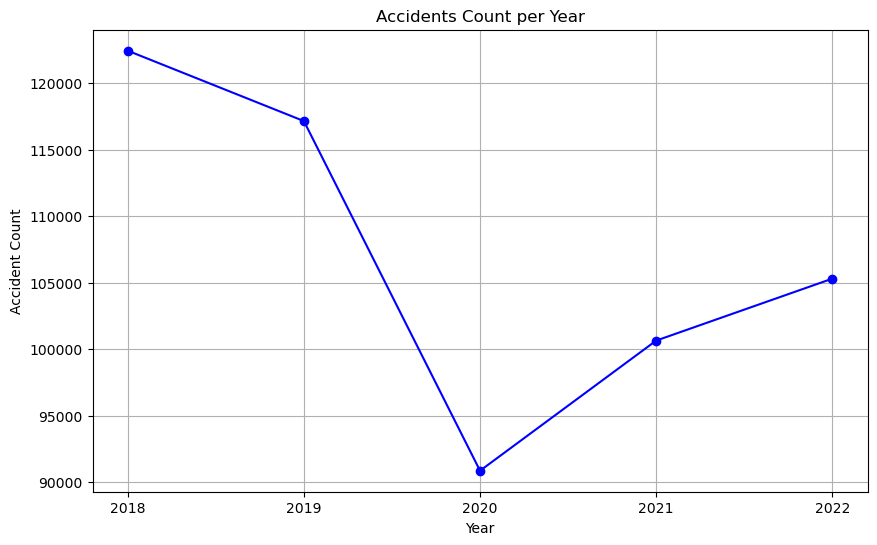

Percentage Change:
accident_year
2018          NaN
2019    -4.319455
2020   -22.436559
2021    10.764710
2022     4.626787
Name: count, dtype: float64
Count at the beginning of 2018: 122446
Count at the beginning of 2019: 117157
Count at the beginning of 2020: 90871
Count at the beginning of 2021: 100653
Count at the beginning of 2022: 105310


In [125]:
import matplotlib.pyplot as plt

# Group data by accident_year and count the occurrences
yearly_counts = data_copy['accident_year'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='b')
plt.title('Accidents Count per Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.xticks(yearly_counts.index)  # Set x-axis ticks to match years
plt.grid(True)
plt.show()

# Calculate the percentage change
percentage_change = yearly_counts.pct_change() * 100

# Display the percentage change
print("Percentage Change:")
print(percentage_change)

for year in [2018, 2019, 2020, 2021, 2022]:
    print(f"Count at the beginning of {year}: {yearly_counts.loc[year]}")

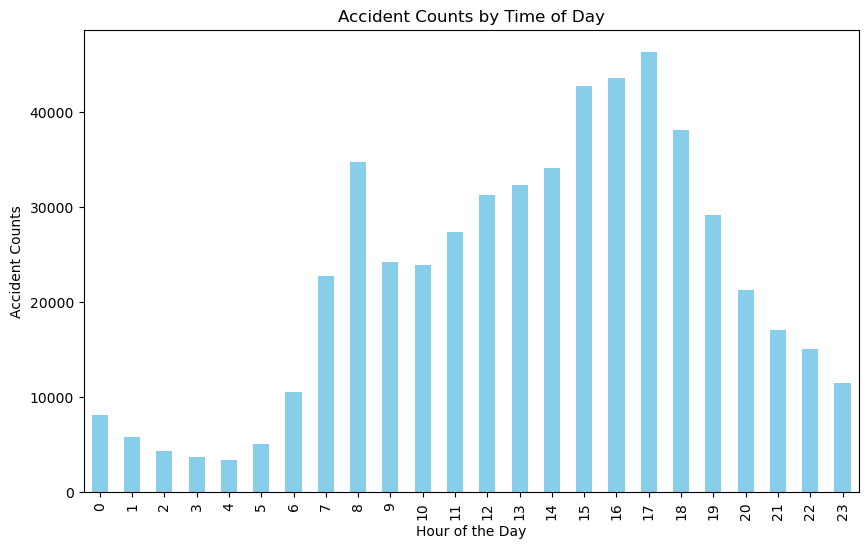

In [126]:
import matplotlib.pyplot as plt

# Assuming 'time' is in the format 'HH:mm'
data_copy['hour'] = pd.to_datetime(data_copy['time']).dt.hour

# Group by hour and calculate counts
hourly_counts = data_copy.groupby('hour').size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Accident Counts by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Counts')
plt.show()



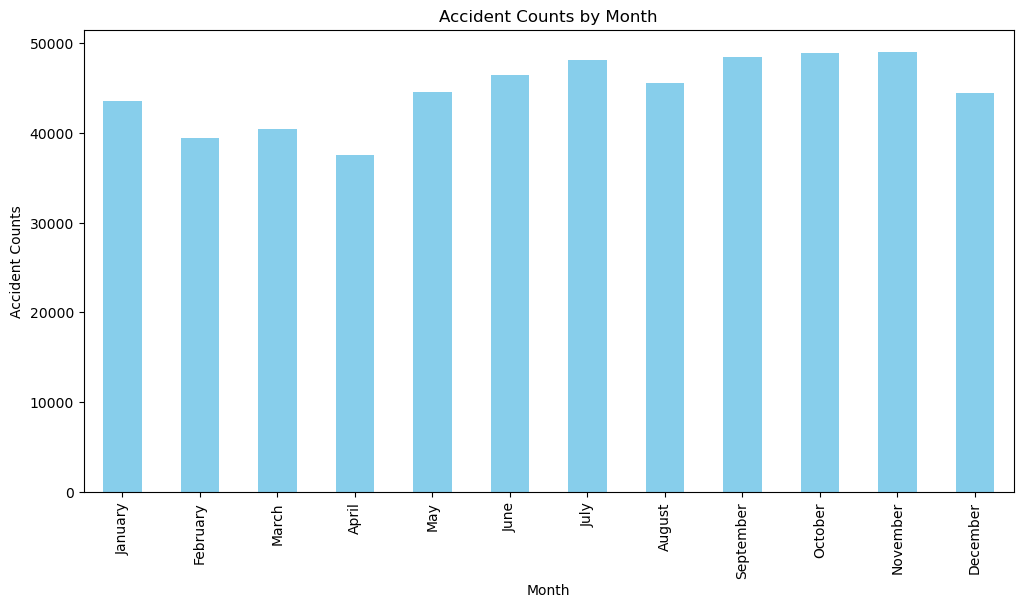

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time' is in the format 'HH:mm' and 'date' is in the format 'DD/MM/YYYY'
data_copy['hour'] = pd.to_datetime(data_copy['time']).dt.hour
data_copy['month'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.month_name()

# Group by month and calculate counts
monthly_counts = data_copy.groupby('month').size()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Accident Counts by Month')
plt.xlabel('Month')
plt.ylabel('Accident Counts')
plt.show()


In [158]:
# Assuming 'date' is in the format 'DD/MM/YYYY'
data_copy['month'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.month

# Calculate counts for April
counts_for_april = data_copy[data_copy['month'] == 4].shape[0]

# Print the result
print(f"The number of counts for April is: {counts_for_april}")


The number of counts for April is: 37510


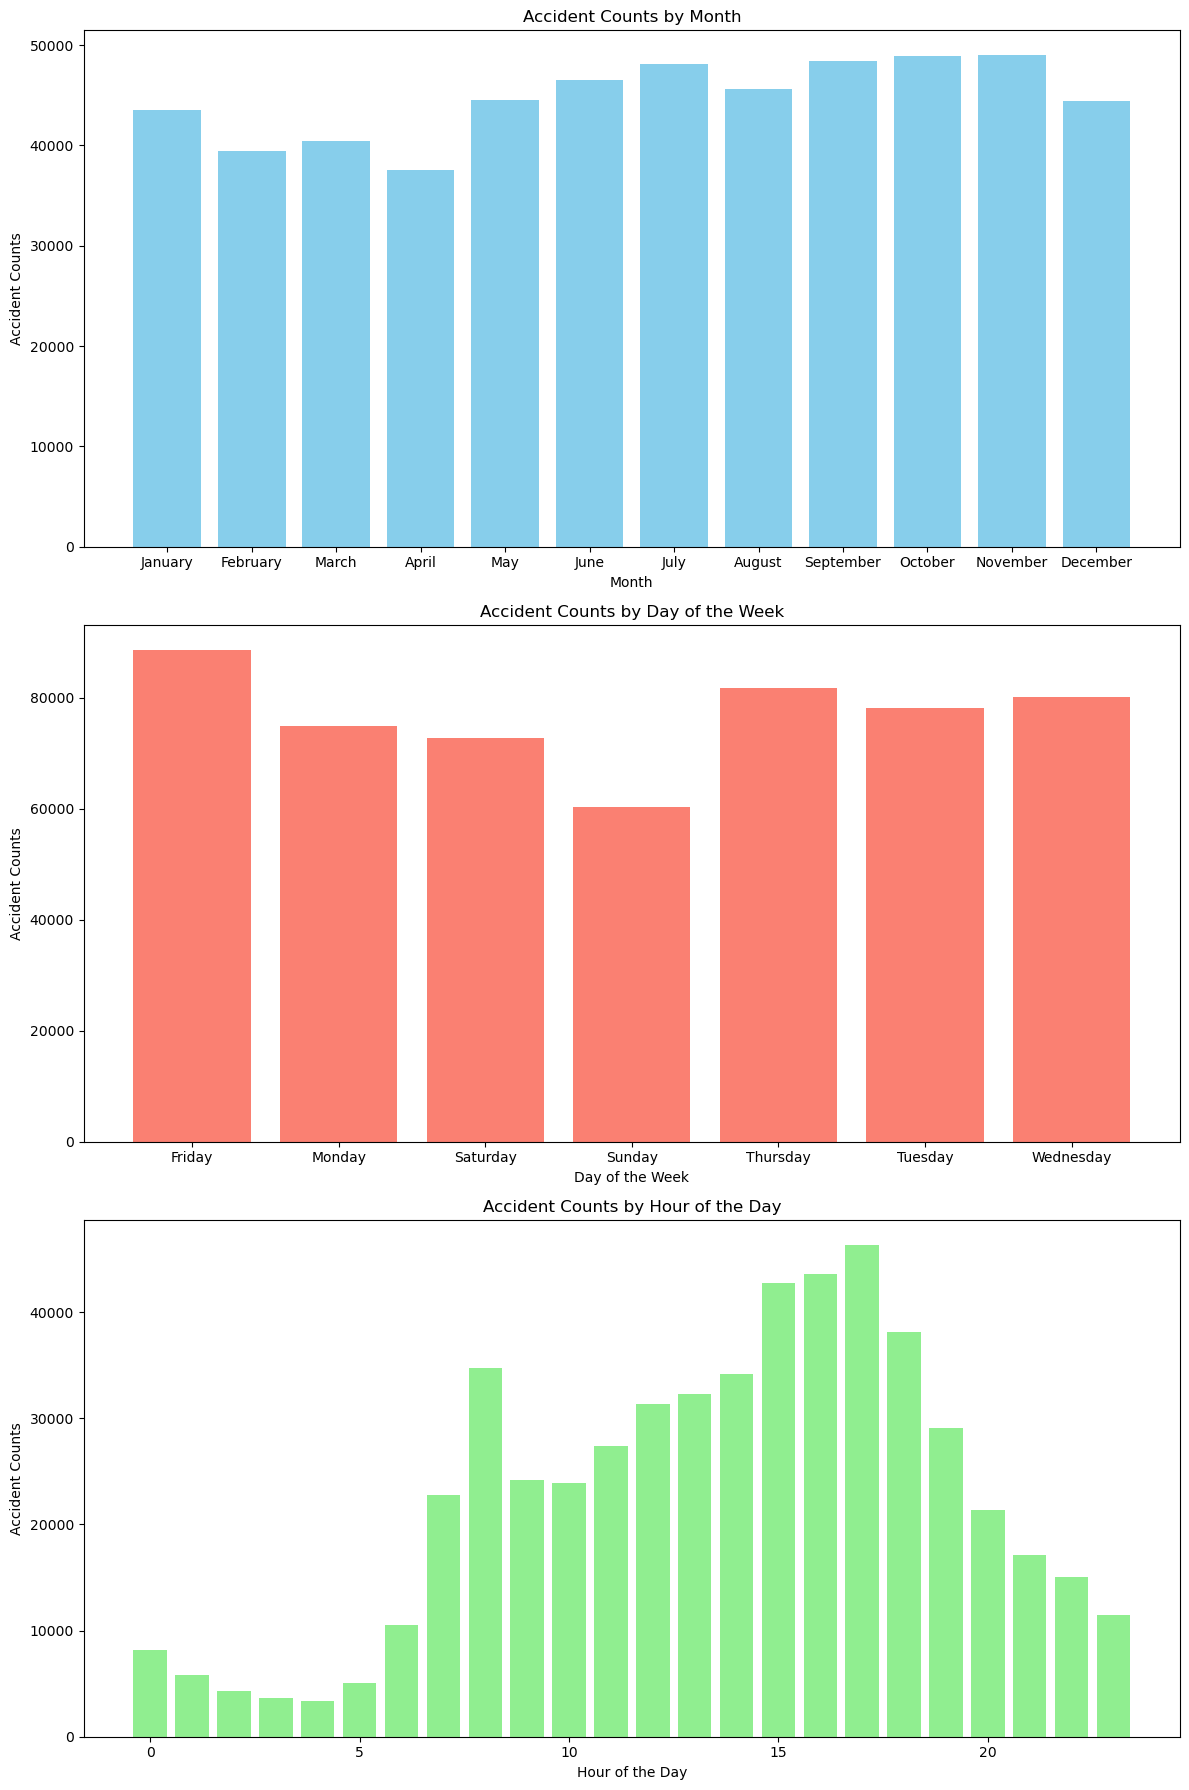

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time' is in the format 'HH:mm' and 'date' is in the format 'DD/MM/YYYY'
data_copy['hour'] = pd.to_datetime(data_copy['time']).dt.hour
data_copy['month'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.month_name()
data_copy['day'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.day_name()

# Group by month, day, and hour and calculate counts
monthly_counts = data_copy.groupby('month').size()
daily_counts = data_copy.groupby('day').size()
hourly_counts = data_copy.groupby('hour').size()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plotting the bar chart for month
axs[0].bar(monthly_counts.index, monthly_counts, color='skyblue')
axs[0].set_title('Accident Counts by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Accident Counts')

# Plotting the bar chart for day
axs[1].bar(daily_counts.index, daily_counts, color='salmon')
axs[1].set_title('Accident Counts by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Accident Counts')

# Plotting the bar chart for hour
axs[2].bar(hourly_counts.index, hourly_counts, color='lightgreen')
axs[2].set_title('Accident Counts by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Accident Counts')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [159]:
# Filter the data_copy DataFrame for Sunday and Friday
sunday_data = data_copy[data_copy['day'] == 'Sunday']
friday_data = data_copy[data_copy['day'] == 'Friday']

# Calculate counts for Sunday and Friday
count_sunday = sunday_data.shape[0]
count_friday = friday_data.shape[0]

# Print the results
print(f"The number of accidents on Sunday is: {count_sunday}")
print(f"The number of accidents on Friday is: {count_friday}")


The number of accidents on Sunday is: 60350
The number of accidents on Friday is: 88586


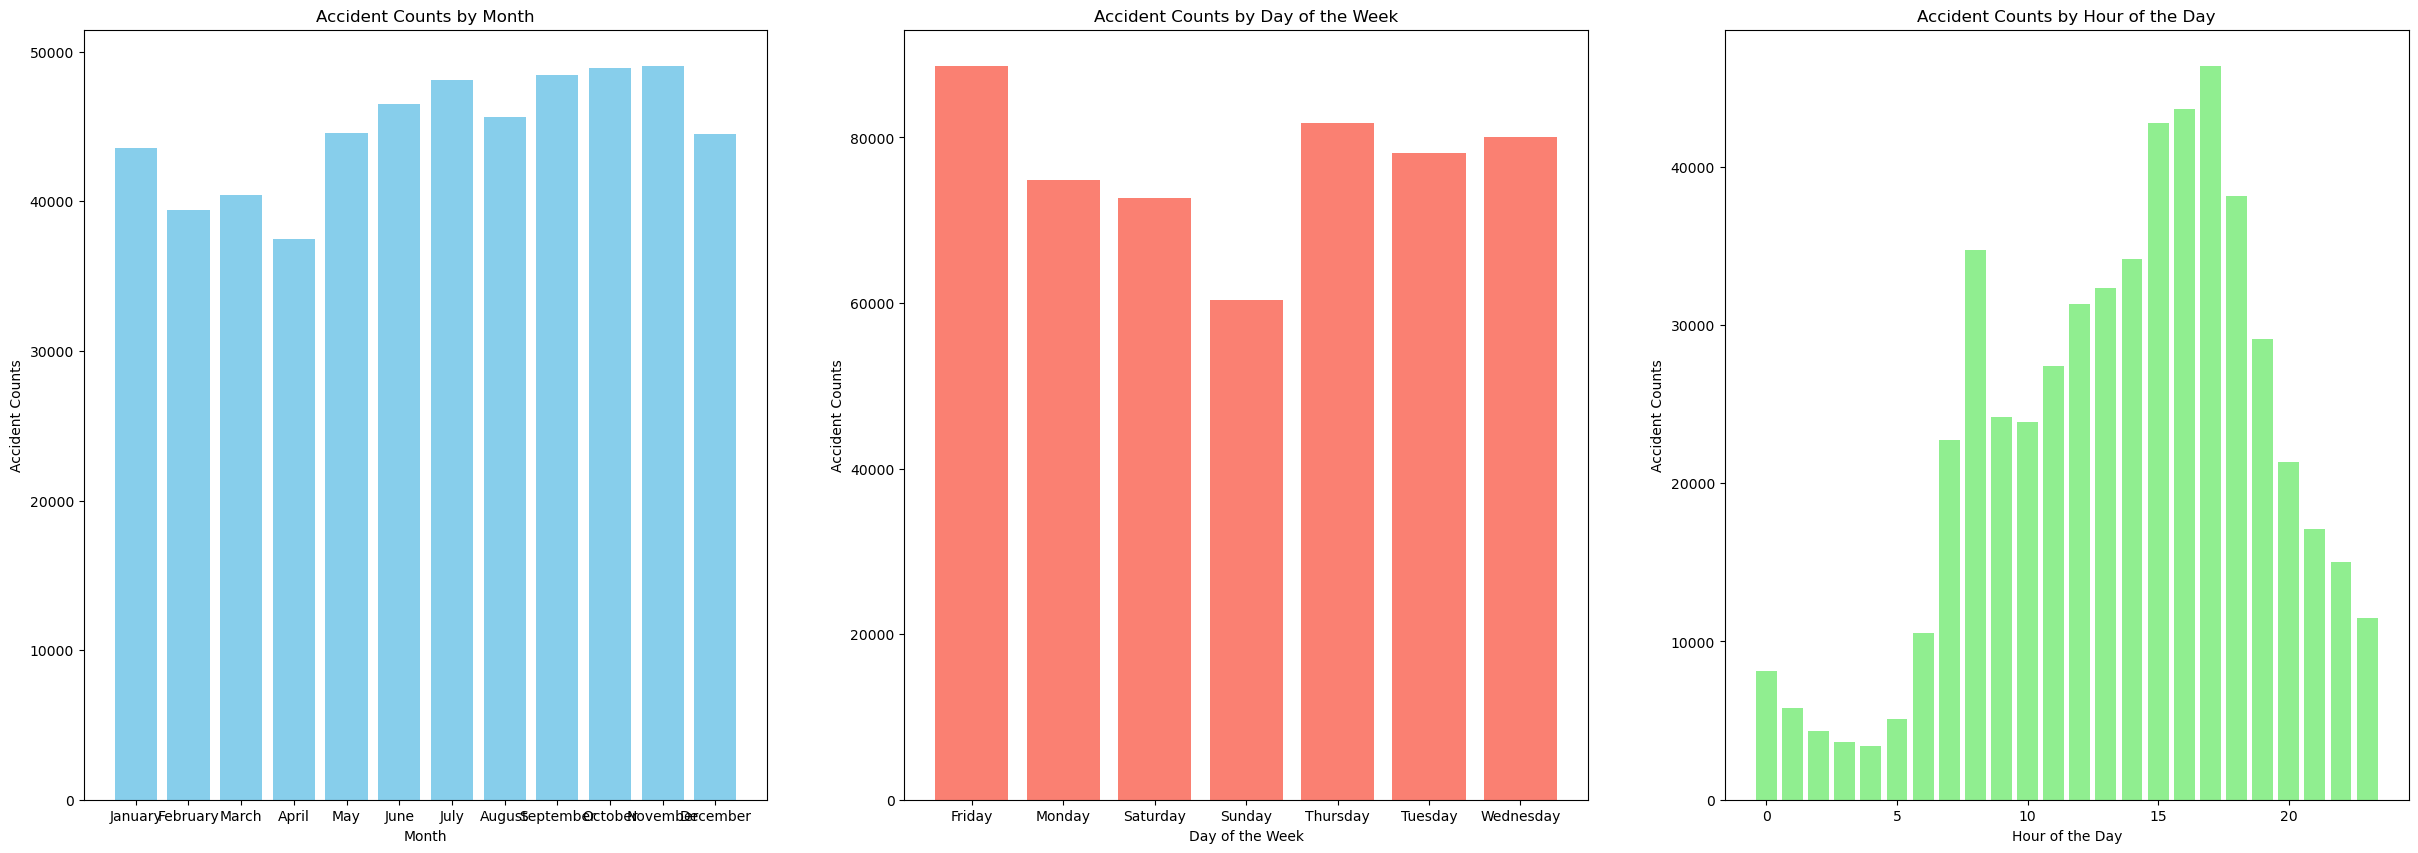

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'time' is in the format 'HH:mm' and 'date' is in the format 'DD/MM/YYYY'
data_copy['hour'] = pd.to_datetime(data_copy['time']).dt.hour
data_copy['month'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.month_name()
data_copy['day'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y').dt.day_name()

# Group by month, day, and hour and calculate counts
monthly_counts = data_copy.groupby('month').size()
daily_counts = data_copy.groupby('day').size()
hourly_counts = data_copy.groupby('hour').size()

# Order months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Plotting the bar chart for month
axs[0].bar(monthly_counts.index, monthly_counts, color='skyblue')
axs[0].set_title('Accident Counts by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Accident Counts')

# Plotting the bar chart for day
axs[1].bar(daily_counts.index, daily_counts, color='salmon')
axs[1].set_title('Accident Counts by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Accident Counts')

# Plotting the bar chart for hour
axs[2].bar(hourly_counts.index, hourly_counts, color='lightgreen')
axs[2].set_title('Accident Counts by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Accident Counts')

# Adjust layout


# Show the plots
plt.show()


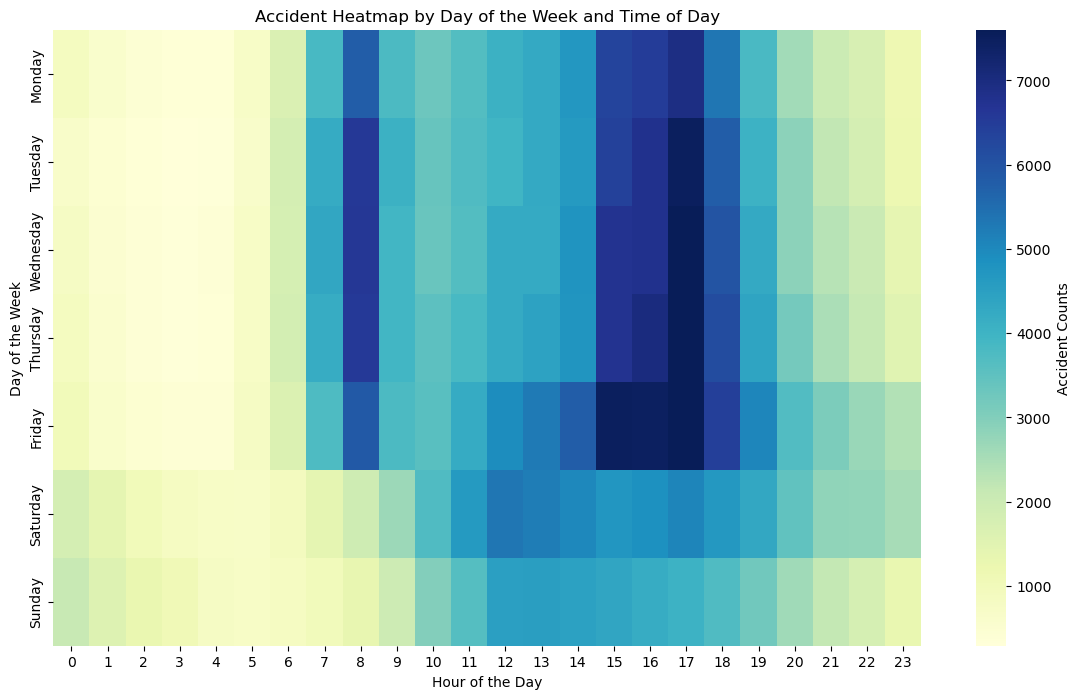

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'time' is in the format 'HH:mm'
data_copy['hour'] = pd.to_datetime(data_copy['time']).dt.hour

# Create a pivot table with day of the week and hour
heatmap_data = data_copy.pivot_table(index=data_copy['date'].dt.day_name(), columns='hour', aggfunc='size', fill_value=0)

# Reorder days of the week for a more logical sequence
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap without numerical annotations
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Accident Counts'})
plt.title('Accident Heatmap by Day of the Week and Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()





In [131]:
# Find the maximum value and corresponding indices (day and hour)
max_value = heatmap_data.max().max()
max_indices = heatmap_data.unstack().idxmax()

# Extract day and hour from the indices
darkest_hour, darkest_day = max_indices

# Print the results
print(f'The darkest day is: {darkest_day}')
print(f'The darkest hour is: {darkest_hour}')
print(f'With the highest accident count of: {max_value}')


The darkest day is: Friday
The darkest hour is: 17
With the highest accident count of: 7602


In [132]:
# Find the minimum value and corresponding indices (day and hour)
min_value = heatmap_data.min().min()
min_indices = heatmap_data.unstack().idxmin()

# Extract day and hour from the indices
lightest_hour, lightest_day = min_indices

# Print the results
print(f'The lightest day is: {lightest_day}')
print(f'The lightest hour is: {lightest_hour}')
print(f'With the lowest accident count of: {min_value}')



The lightest day is: Tuesday
The lightest hour is: 3
With the lowest accident count of: 290


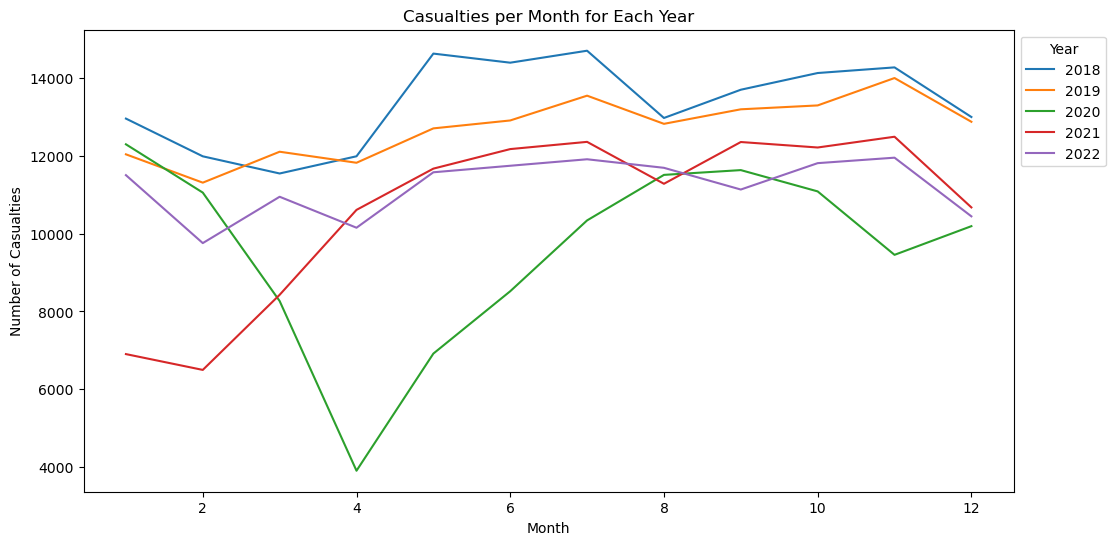

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is in the format 'dd/mm/yyyy' and 'number_of_casualties' indicates casualties
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Extract year and month from the date
data_copy['year'] = data_copy['date'].dt.year
data_copy['month'] = data_copy['date'].dt.month

# Group by year and month, and calculate the sum of casualties
monthly_casualties = data_copy.groupby(['year', 'month'])['number_of_casualties'].sum().unstack().T

# Plotting the line graph
plt.figure(figsize=(12, 6))

for year in monthly_casualties.columns:
    plt.plot(monthly_casualties.index, monthly_casualties[year], label=year)

plt.title('Casualties per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()


In [134]:
#Factors Influencing Accident Severity:


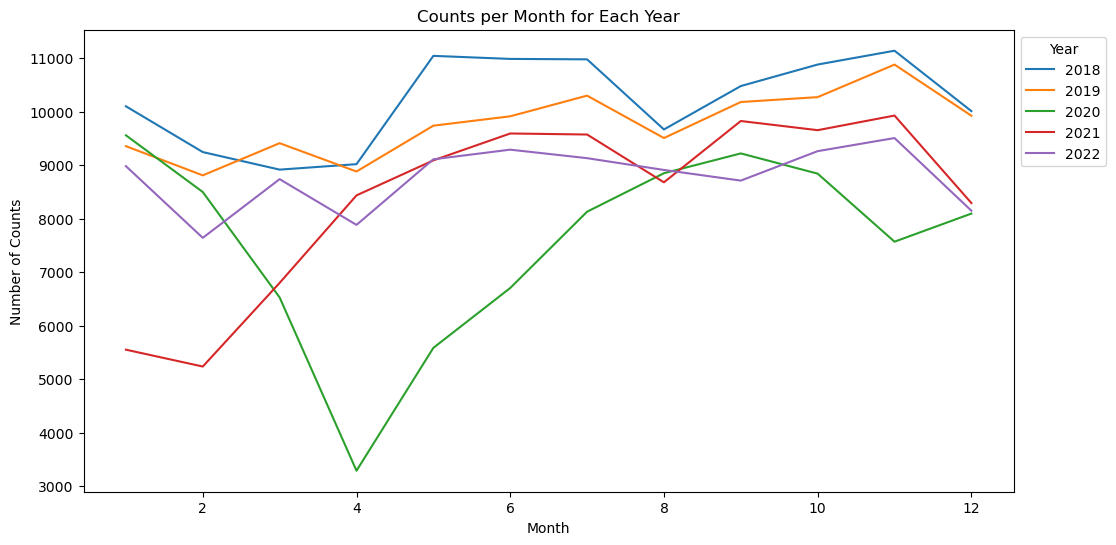

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is in the format 'dd/mm/yyyy'
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Extract year and month from the date
data_copy['year'] = data_copy['date'].dt.year
data_copy['month'] = data_copy['date'].dt.month

# Group by year and month, and calculate the counts
monthly_counts = data_copy.groupby(['year', 'month']).size().unstack().T

# Plotting the line graph
plt.figure(figsize=(12, 6))

for year in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[year], label=year)

plt.title('Counts per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Counts')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()


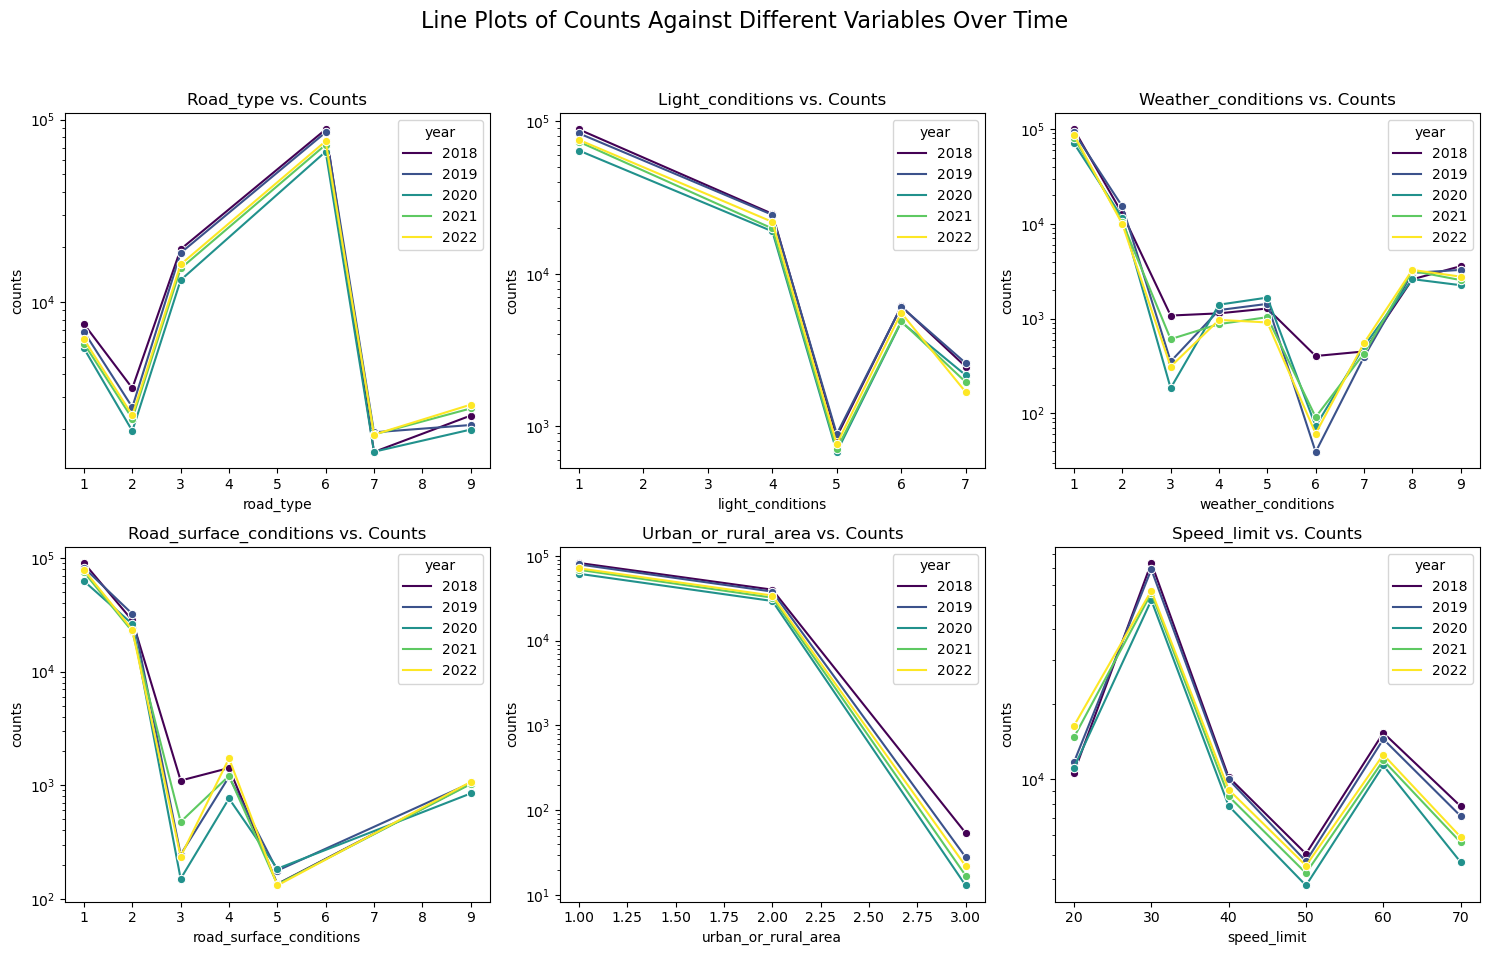

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime format
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Define the variables to analyze
variables = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'speed_limit']

# Extract year from the 'date' column
data_copy['year'] = data_copy['date'].dt.year

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Line Plots of Counts Against Different Variables Over Time', fontsize=16)

# Loop through each variable and create line plots
for i, variable in enumerate(variables):
    ax = axes.flatten()[i]
    sns.lineplot(x=variable, y='counts', hue='year', data=data_copy.groupby(['year', variable]).size().reset_index(name='counts'), ax=ax, marker='o', palette='viridis')
    ax.set_title(f'{variable.capitalize()} vs. Counts')
    ax.set_yscale('log')  # Use logarithmic scale on the y-axis

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




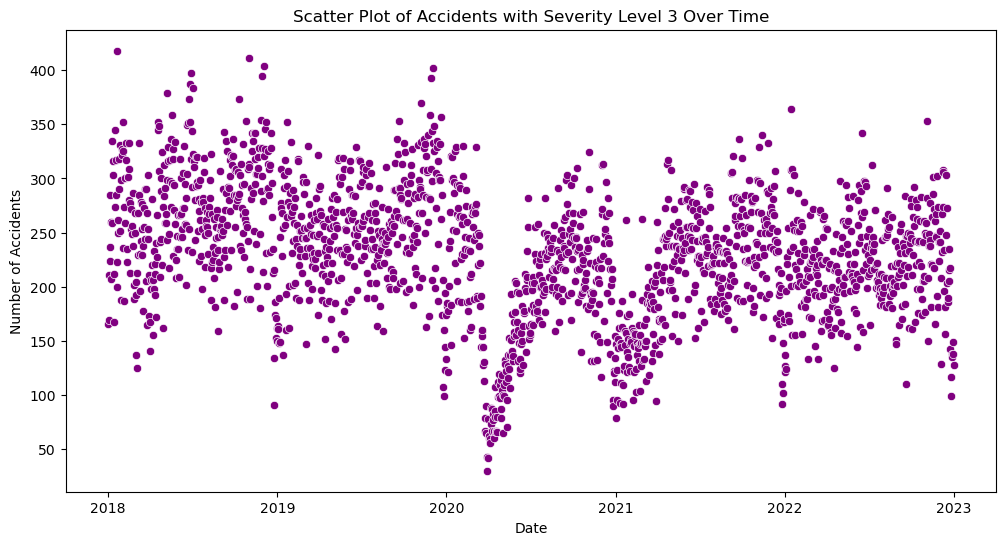

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for accidents with severity level 3
severity_3_data = data_copy[data_copy['accident_severity'] == 3]

# Convert 'date' column to datetime format
severity_3_data['date'] = pd.to_datetime(severity_3_data['date'], format='%d/%m/%Y')

# Set up the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='counts', data=severity_3_data.groupby('date').size().reset_index(name='counts'), color='purple')
plt.title('Scatter Plot of Accidents with Severity Level 3 Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()



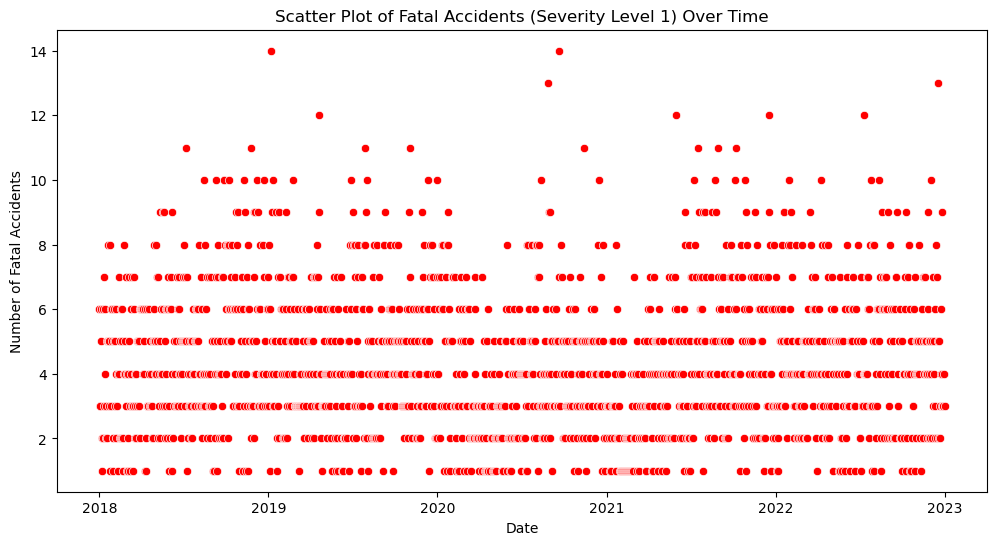

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for accidents with severity level 1
severity_1_data = data_copy[data_copy['accident_severity'] == 1]

# Convert 'date' column to datetime format
severity_1_data['date'] = pd.to_datetime(severity_1_data['date'], format='%d/%m/%Y')

# Set up the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='counts', data=severity_1_data.groupby('date').size().reset_index(name='counts'), color='red')
plt.title('Scatter Plot of Fatal Accidents (Severity Level 1) Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatal Accidents')
plt.show()


In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Select relevant columns for clustering
cluster_columns = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'speed_limit']

# Subset the data with these columns
cluster_data = data_copy[cluster_columns]

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in cluster_columns:
    cluster_data[column] = label_encoder.fit_transform(cluster_data[column])

# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(cluster_data)

# Visualize the clusters
# You can plot a pairplot or any other visualization to analyze the clusters

# Analyze the cluster characteristics, e.g., average severity in each cluster
cluster_summary = cluster_data.groupby('cluster').mean()

# Display the cluster summary
cluster_summary



road_type  light_conditions  weather_conditions  \
cluster                                                    
0         2.608458          0.665759            0.260082   
1         2.938056          0.364152            0.154951   
2         2.879729          0.760177            6.953245   
3         0.305412          0.362100            0.188996   

         road_surface_conditions  urban_or_rural_area  speed_limit  
cluster                                                             
0                       0.377810             0.898207     4.095487  
1                       0.260950             0.161164     0.961379  
2                       1.106490             0.258409     1.394919  
3                       0.272388             0.198355     1.025277

In [140]:
# Before encoding
original_speed_limit_values = data_copy['speed_limit'].values

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
cluster_data['speed_limit'] = label_encoder.fit_transform(cluster_data['speed_limit'])

# After encoding
encoded_speed_limit_values = cluster_data['speed_limit'].values

# Compare the values
print("Original 'speed_limit' values:", original_speed_limit_values[:10])
print("Encoded 'speed_limit' values:", encoded_speed_limit_values[:10])


Original 'speed_limit' values: [30 30 20 30 30 30 30 30 30 30]
Encoded 'speed_limit' values: [1 1 0 1 1 1 1 1 1 1]


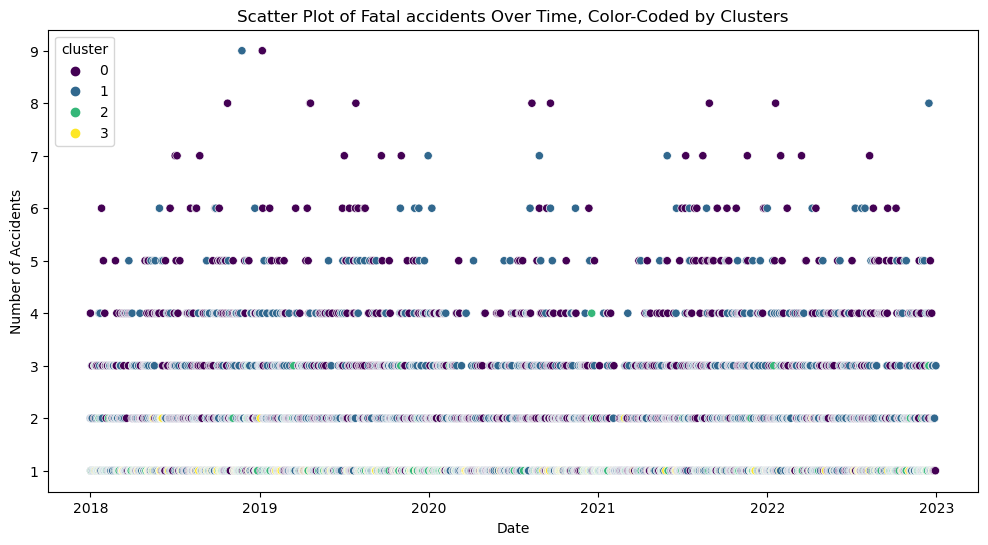

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for accidents with severity level 1
severity_3_data = data_copy[data_copy['accident_severity'] == 1]

# Merge with the cluster data
merged_data = pd.merge(severity_3_data, cluster_data['cluster'], left_index=True, right_index=True)

# Convert 'date' column to datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'], format='%d/%m/%Y')

# Set up the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='counts', hue='cluster', data=merged_data.groupby(['date', 'cluster']).size().reset_index(name='counts'), palette='viridis')
plt.title('Scatter Plot of Fatal accidents Over Time, Color-Coded by Clusters')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()



In [142]:
# Filter entries for Cluster 0
cluster_0_entries = merged_data[merged_data['cluster'] == 0]

# Display entries for Cluster 0
cluster_0_entries




accident_year  accident_severity  number_of_vehicles  \
705              2018                  1                   1   
3911             2018                  1                   1   
4961             2018                  1                   2   
8548             2018                  1                   1   
13190            2018                  1                   1   
...               ...                ...                 ...   
536149           2022                  1                   3   
536155           2022                  1                   1   
536263           2022                  1                   4   
536311           2022                  1                   1   
536340           2022                  1                   1   

        number_of_casualties       date  day_of_week   time  \
705                        1 2018-01-14            1  22:09   
3911                       1 2018-03-03            7  13:47   
4961                       1 2018-03-20            3  09:54   
8548                       1 2018-05-14            2  00:10   
13190                      1 2018-07-13            6  16:38   
...                      ...        ...          ...    ...   
536149                     1 2022-12-07            4  18:20   
536155                     1 2022-12-08            5  19:15   
536263                     2 2022-12-19            2  08:03   
536311                     1 2022-12-23            6  22:50   
536340                     1 2022-12-28            4  08:45   

       local_authority_ons_district  road_type  speed_limit  light_conditions  \
705                       E09000005          3           50                 4   
3911                      E09000017          3           50                 1   
4961                      E09000016          3           70                 1   
8548                      E09000031          3           50                 4   
13190                     E09000003          3           50                 1   
...                             ...        ...          ...               ...   
536149                    S12000029          3           50                 4   
536155                    S12000047          6           50                 6   
536263                    S12000034          6           60                 6   
536311                    S12000006          6           60                 6   
536340                    S12000028          6           50                 1   

        weather_conditions  road_surface_conditions  urban_or_rural_area  \
705                      1                        1                    1   
3911                     1                        1                    2   
4961                     1                        1                    2   
8548                     1                        1                    1   
13190                    1                        1                    1   
...                    ...                      ...                  ...   
536149                   1                        2                    1   
536155                   1                        2                    2   
536263                   1                        2                    2   
536311                   2                        2                    2   
536340                   2                        2                    2   

                district_name  hour  month        day  year  cluster  
705                     Brent    22      1     Sunday  2018        0  
3911               Hillingdon    13      3   Saturday  2018        0  
4961                 Havering     9      3    Tuesday  2018        0  
8548           Waltham Forest     0      5     Monday  2018        0  
13190                  Barnet    16      7     Friday  2018        0  
...                       ...   ...    ...        ...   ...      ...  
536149      South Lanarkshire    18     12  Wednesday  2022        0  
536155                   Fif

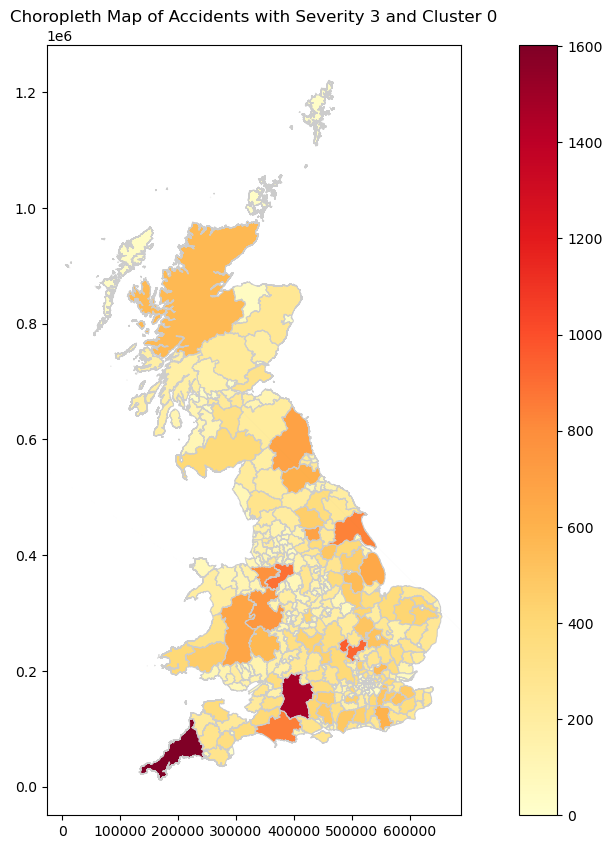

In [143]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_copy is your DataFrame and district_boundaries is your GeoDataFrame
district_counts = data_copy['district_name'].value_counts()

# Merge district_boundaries with the counts based on the 'LAD22CD' and 'district_name' columns
merged_data = district_boundaries.merge(district_counts, left_on='LAD22NM', right_index=True, how='left')

# Drop districts with missing values
merged_data = merged_data.dropna(subset=[merged_data.columns[-1]])

# Filter data for accidents with severity level 3 and cluster 0
filtered_data = data_copy[(data_copy['accident_severity'] == 3) & (cluster_data['cluster'] == 0)]

# Group by district_name and count the occurrences
severity_cluster_counts = filtered_data['district_name'].value_counts()

# Merge with the district_boundaries
merged_data = merged_data.merge(severity_cluster_counts, left_on='LAD22NM', right_index=True, how='left')

# Fill NaN values with 0
merged_data[merged_data.columns[-1]] = merged_data[merged_data.columns[-1]].fillna(0)

# Plot the choropleth map with yellow to red color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column=merged_data.columns[-1], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('Choropleth Map of Accidents with Severity 3 and Cluster 0')

# Show the plot
plt.show()





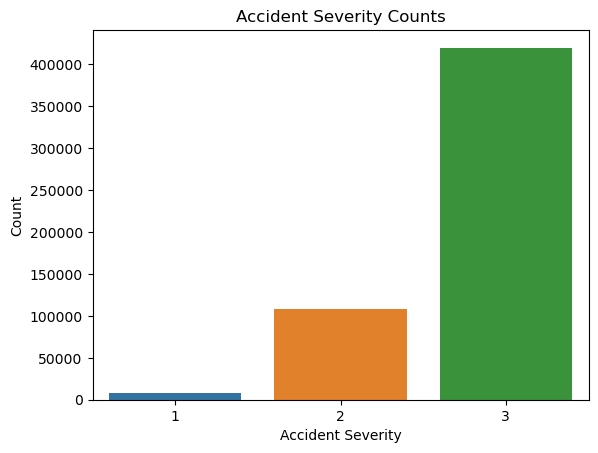

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'accident_severity' is the column representing accident severity in your DataFrame
# Create a count plot
sns.countplot(x='accident_severity', data=data_copy)

# Set plot title and labels
plt.title('Accident Severity Counts')
plt.xlabel('Accident Severity')
plt.ylabel('Count')

# Show the plot
plt.show()


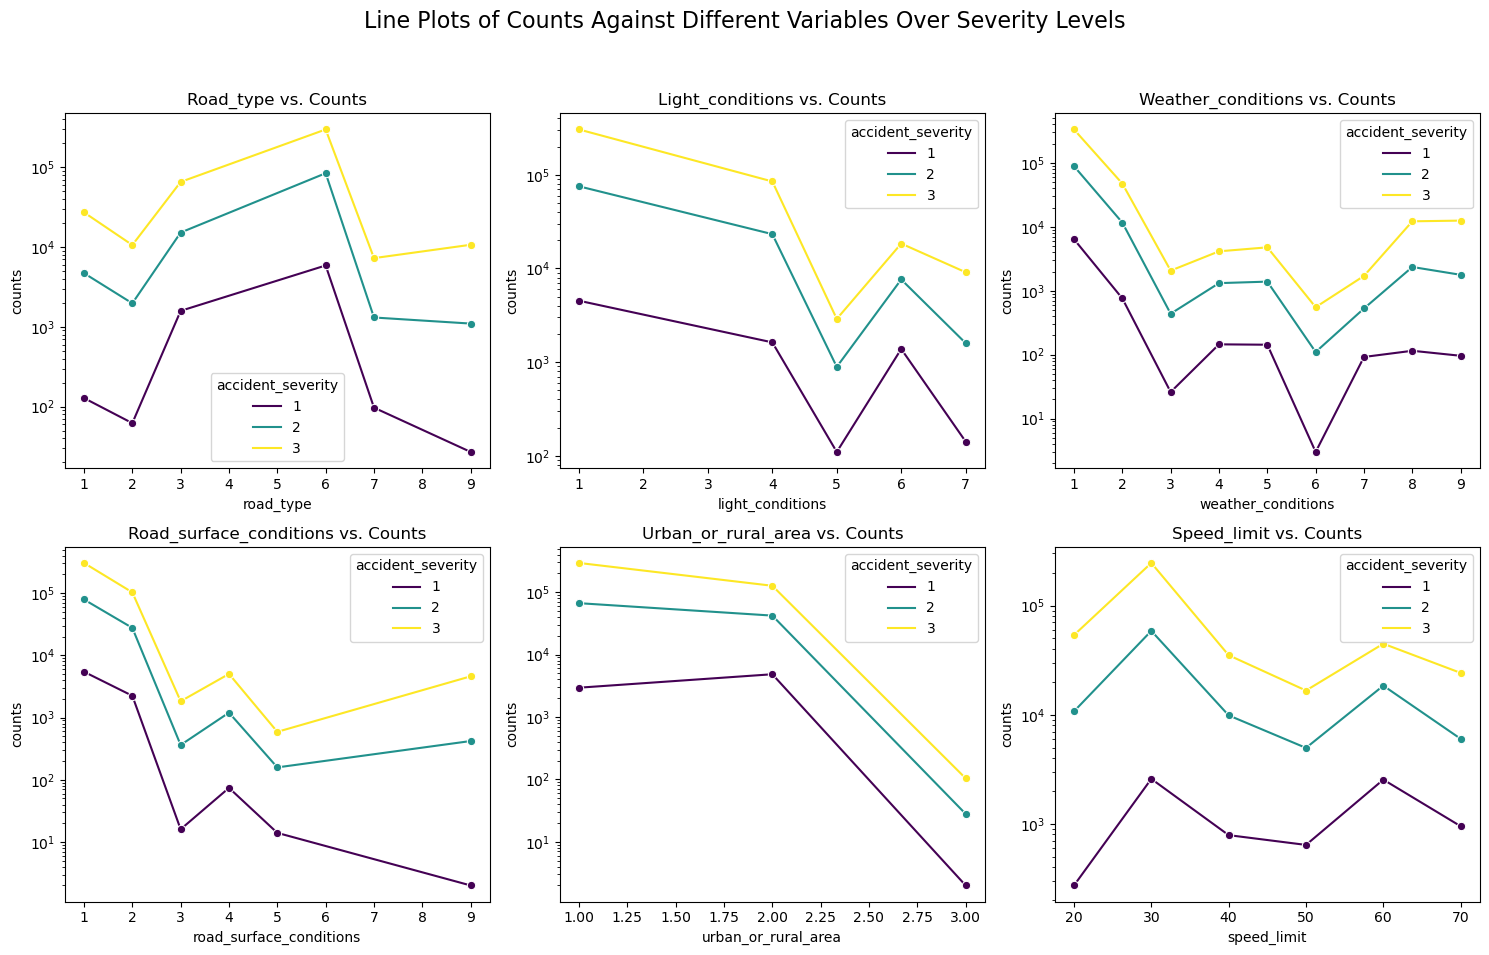

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'date' column to datetime format
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Define the variables to analyze
variables = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'speed_limit']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Line Plots of Counts Against Different Variables Over Severity Levels', fontsize=16)

# Loop through each variable and create line plots
for i, variable in enumerate(variables):
    ax = axes.flatten()[i]
    sns.lineplot(x=variable, y='counts', hue='accident_severity', data=data_copy.groupby(['accident_severity', variable]).size().reset_index(name='counts'), ax=ax, marker='o', palette='viridis')
    ax.set_title(f'{variable.capitalize()} vs. Counts')
    ax.set_yscale('log')  # Use logarithmic scale on the y-axis

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


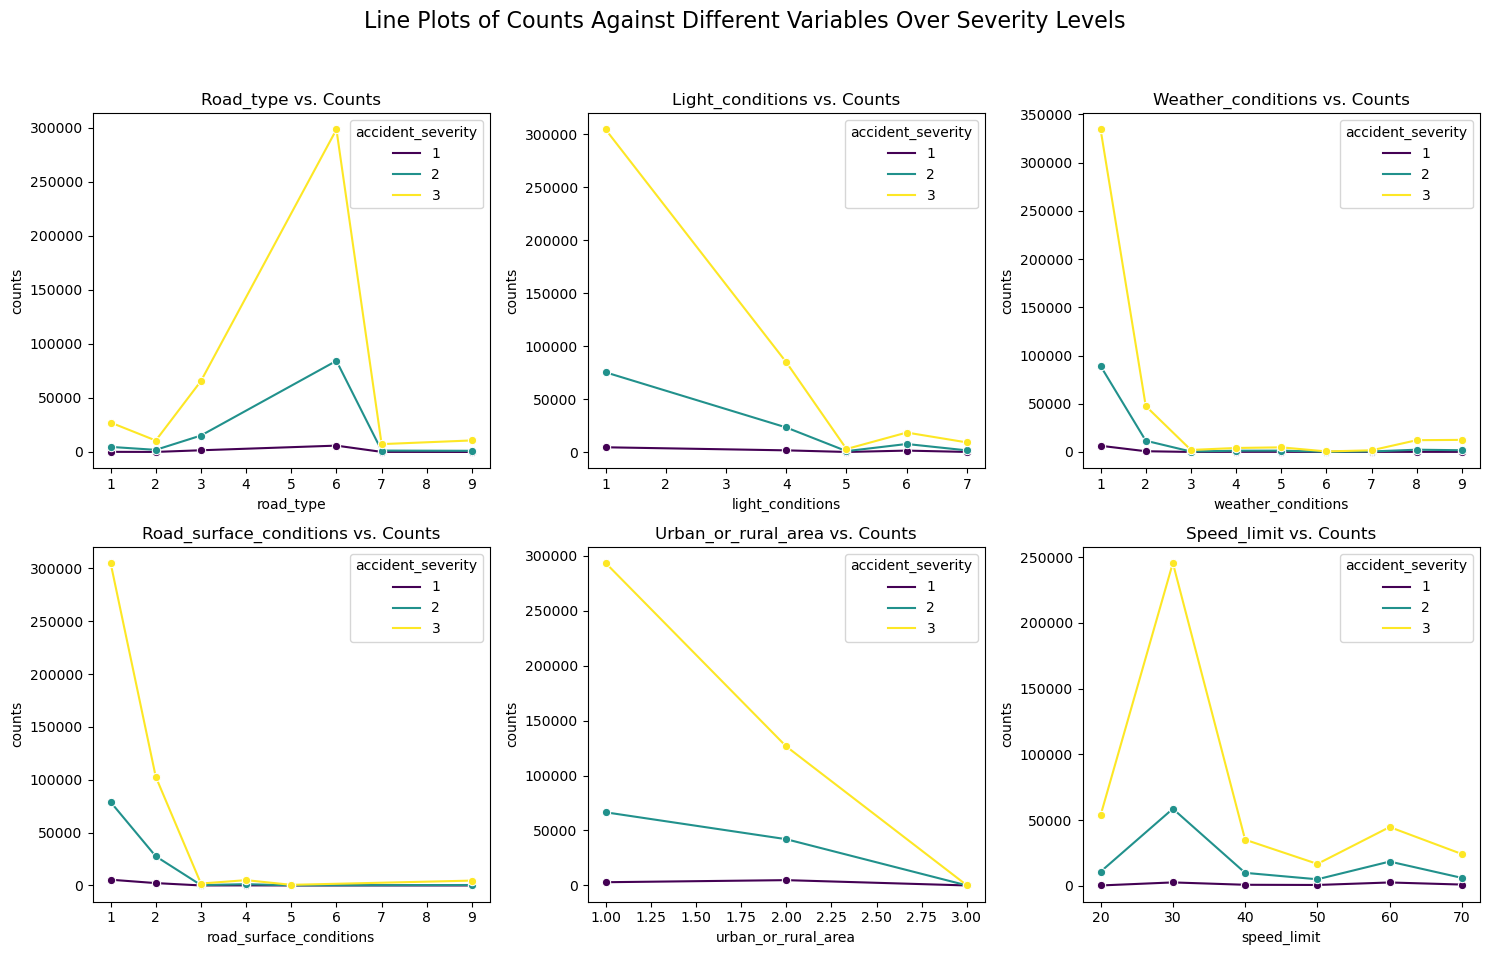

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'date' column to datetime format
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Define the variables to analyze
variables = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'speed_limit']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Line Plots of Counts Against Different Variables Over Severity Levels', fontsize=16)

# Loop through each variable and create line plots
for i, variable in enumerate(variables):
    ax = axes.flatten()[i]
    sns.lineplot(x=variable, y='counts', hue='accident_severity', data=data_copy.groupby(['accident_severity', variable]).size().reset_index(name='counts'), ax=ax, marker='o', palette='viridis')
    ax.set_title(f'{variable.capitalize()} vs. Counts')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


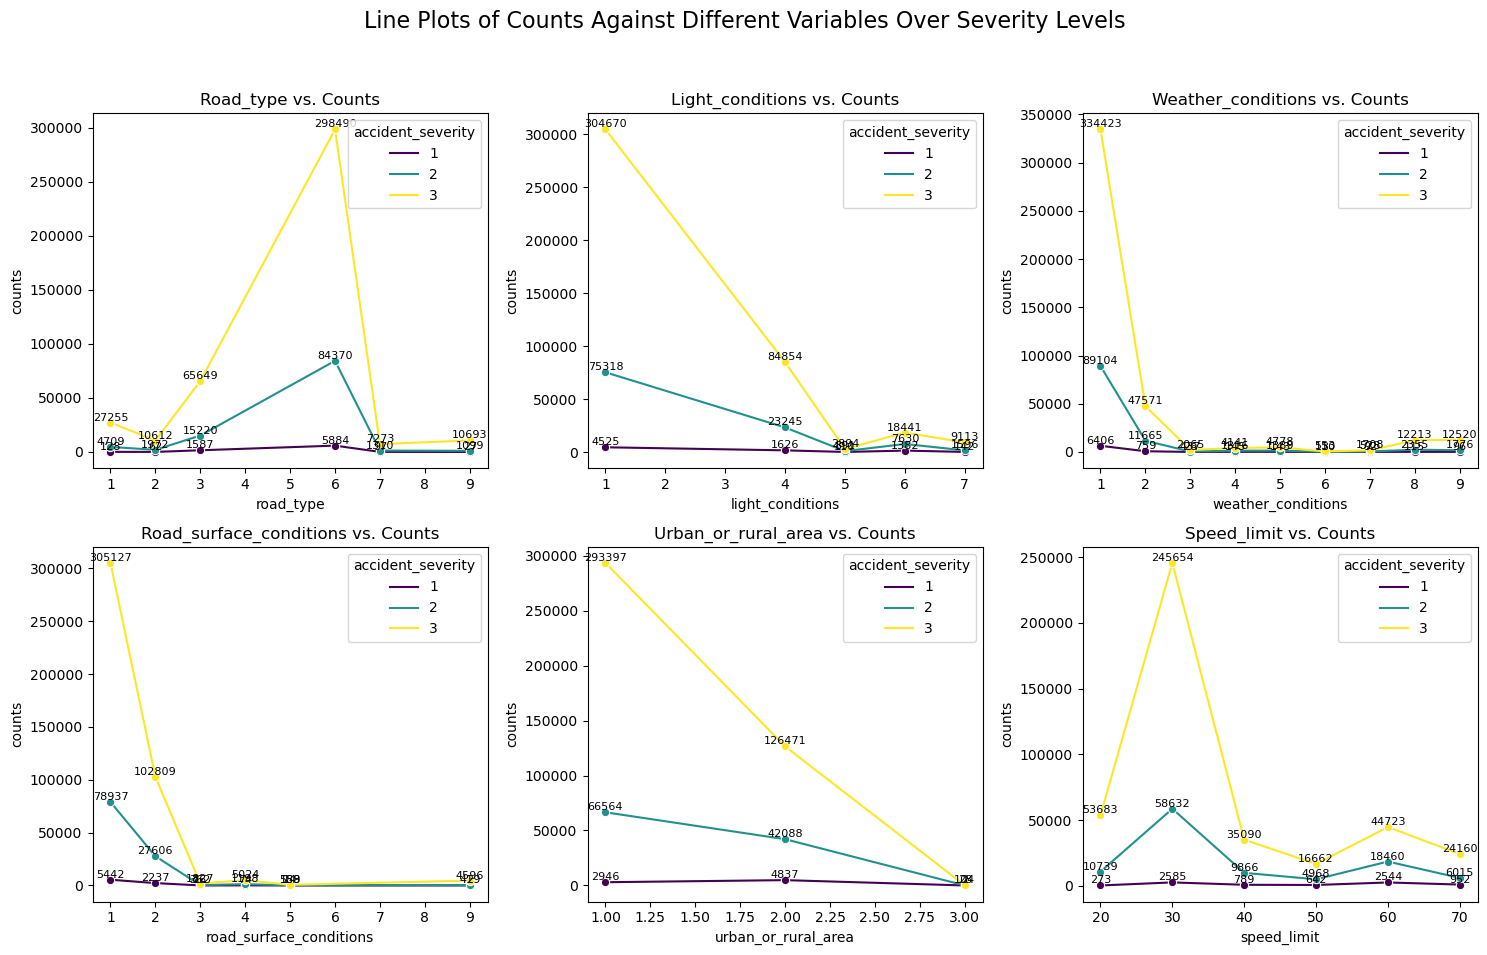

Counts for Road_type:
    accident_severity  road_type  counts
0                   1          1     128
1                   1          2      62
2                   1          3    1587
3                   1          6    5884
4                   1          7      97
5                   1          9      27
6                   2          1    4709
7                   2          2    1972
8                   2          3   15220
9                   2          6   84370
10                  2          7    1310
11                  2          9    1099
12                  3          1   27255
13                  3          2   10612
14                  3          3   65649
15                  3          6  298490
16                  3          7    7273
17                  3          9   10693


Counts for Light_conditions:
    accident_severity  light_conditions  counts
0                   1                 1    4525
1                   1                 4    1626
2                   1   

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'date' column to datetime format
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Define the variables to analyze
variables = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'speed_limit']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Line Plots of Counts Against Different Variables Over Severity Levels', fontsize=16)

# Create an empty list to store counts dataframes
counts_dfs = []

# Loop through each variable and create line plots
for i, variable in enumerate(variables):
    ax = axes.flatten()[i]
    
    # Group by severity and variable, calculate counts, and reset index
    counts_data = data_copy.groupby(['accident_severity', variable]).size().reset_index(name='counts')
    
    # Plot line plot
    sns.lineplot(x=variable, y='counts', hue='accident_severity', data=counts_data, ax=ax, marker='o', palette='viridis')
    
    # Display counts as text on each data point
    for severity in data_copy['accident_severity'].unique():
        subset_data = counts_data[counts_data['accident_severity'] == severity]
        for _, row in subset_data.iterrows():
            ax.text(row[variable], row['counts'], f'{row["counts"]}', ha='center', va='bottom', fontsize=8)
    
    ax.set_title(f'{variable.capitalize()} vs. Counts')
    
    # Append counts_data to the list
    counts_dfs.append(counts_data)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display counts separately below each graph
for i, variable in enumerate(variables):
    print(f'Counts for {variable.capitalize()}:')
    print(counts_dfs[i])
    print('\n')



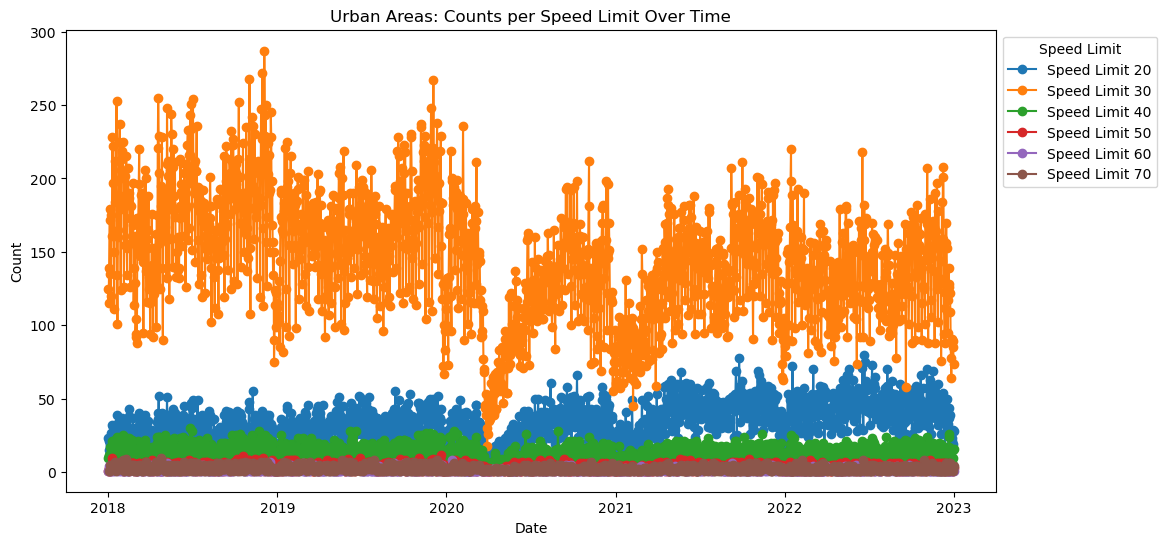

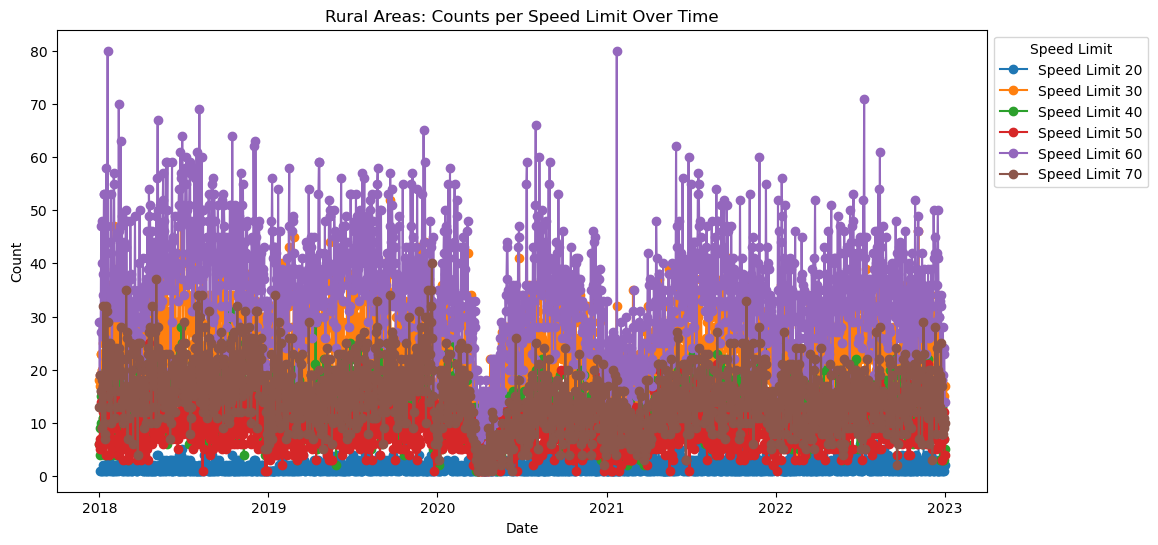

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is in the format 'dd/mm/yyyy', 'urban_or_rural_area', and 'speed_limit' are columns in the dataset
data_copy['date'] = pd.to_datetime(data_copy['date'], format='%d/%m/%Y')

# Separate data for urban and rural areas
urban_data = data_copy[data_copy['urban_or_rural_area'] == 1]
rural_data = data_copy[data_copy['urban_or_rural_area'] == 2]

# Group by date and speed limit for urban and rural data
urban_grouped = urban_data.groupby(['date', 'speed_limit']).size().unstack()
rural_grouped = rural_data.groupby(['date', 'speed_limit']).size().unstack()

# Plotting the line graph for Urban
plt.figure(figsize=(12, 6))
for speed_limit in urban_grouped.columns:
    plt.plot(urban_grouped.index, urban_grouped[speed_limit], label=f'Speed Limit {speed_limit}', linestyle='-', marker='o')

plt.title('Urban Areas: Counts per Speed Limit Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Speed Limit', bbox_to_anchor=(1, 1))
plt.show()

# Plotting the line graph for Rural
plt.figure(figsize=(12, 6))
for speed_limit in rural_grouped.columns:
    plt.plot(rural_grouped.index, rural_grouped[speed_limit], label=f'Speed Limit {speed_limit}', linestyle='-', marker='o')

plt.title('Rural Areas: Counts per Speed Limit Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Speed Limit', bbox_to_anchor=(1, 1))
plt.show()

